<center>DATA PREPARATION</center>

# Pengantar 

> Suatu proses yang dilakukan untuk membuat data mentah menjadi data yang berkualitas dan siap untuk digunakan dalam proses analisis atau permodelan. 

## Data preparation dalam CRISP-DM.

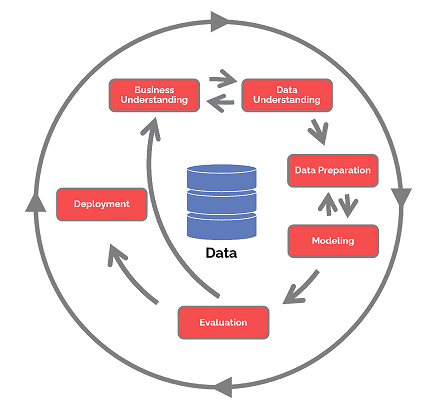



> The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tools) from the initial raw data. Data preparation tasks are likely to be ```performed multiple times and not in any prescribed order```. Tasks include table, record and attribute selection as well as transformation and cleaning of data for
modeling tools.

Sumber: Chapman et al (2000)

## Tugas yang memakan waktu

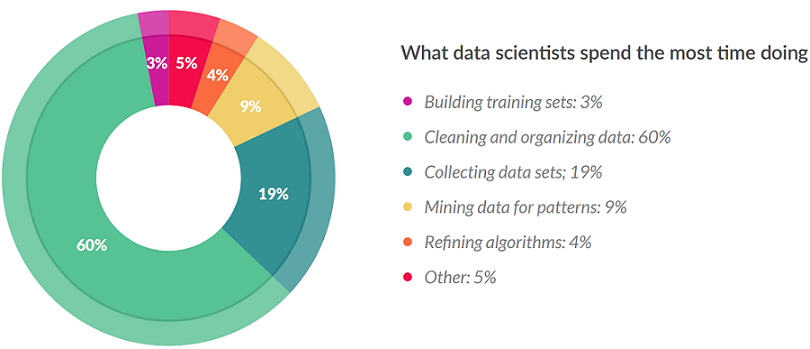

[Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=3bc50d1f6f63) menyebutkan bahwa data preparation adalah pekerjaan yang paling membosankan dan menguras waktu, tenaga dan pikiran.

> Kunci: __SABAR !__ 

## Apa yang dikerjakan

> Get dataset, select data, clean data, construct data, integrate data, and format data Chapman et al (2000).

Dalam bentuk gambar: <br>
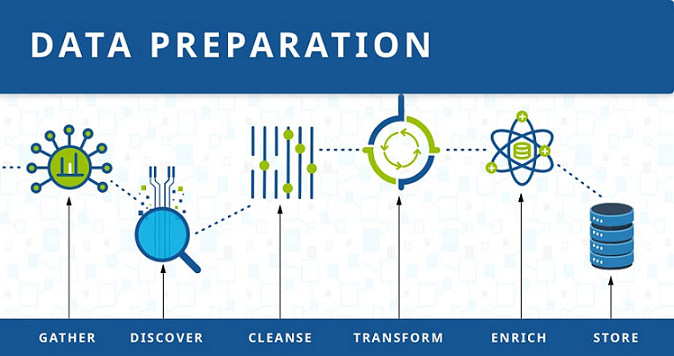 <br>

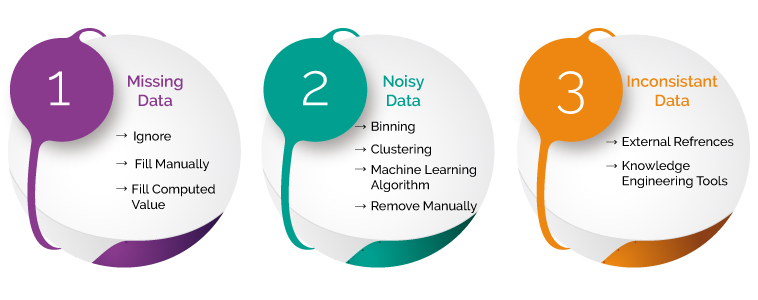


## Tools yang dibutuhkan

|Tools|Fungsi| 
|---|---|
|[Pandas](https://pandas.pydata.org/)|Mengolah dataset|
|[D-Tale](https://pypi.org/project/dtale/)|EDA secara simple|
|[Regular Expression](https://docs.python.org/3/howto/regex.html)|Ekstraksi atau pencocokan pola teks|
|[Bamboolib](https://bamboolib.8080labs.com/)|Manipulasi data dengan Pandas tanpa coding|
|[regex101](https://regex101.com/)|Playground untuk regex|
|[Scikit-learn](https://scikit-learn.org/stable/auto_examples/index.html)|Fungsi data preparation|
|[missingno](https://anaconda.org/conda-forge/missingno)|Visualisasi missing value|

In [144]:
# Load library
import pandas as pd
import dtale
import re
import missingno as msno
%matplotlib inline

## Data yang digunakan

Kami tidak menggunakan single dataset untuk mendemokan semua proses pada data preparation. <br> 

Terdapat beberapa ragam dataset yang berbeda-beda sesuai dengan studi kasus. <br>

## Agenda Materi Ini

|Agenda|Yang dipelajari|
|---|---|
|Pandas for Data Wrangling|Pemahaman ppenggunaan pandas untuk mengolah data|
|Data Cleaning|Pemahaman mendalam tipe data, memperbaiki data dan bentuk DataFrame, menggabungkan DataFrame, menghapus duplicate data, menghapus missing data, dan membuat rekapitulasi data|
|Regular Expression|Pemahaman regex token, menggunakan library RegEx, dan mengaplikasikan RegEx di Pandas|
|EDA (Review Materi Sebelumnya)|Apa itu EDA dan EDA dengan D-Tale|
|Feature Engineering|Ekstaksi inisial dari kolom Name dan pengelompokkan penumpang berdasarkan kolom Age|
|Encoding|Merubah kolom Sex, Embarked, Initial, dan Age_group menjadi numerik|

## Materi Pengayaan

### List 
### List Comprehension
List comprehension merupakan ekspresi untuk mempermudah iterasi terhadap list, membuat kode yang lebih rapi dan pengolahan yang lebih efisien.

In [145]:
#Contoh list comprehension

list1 = [1,2,3,4,5,6,7,8,9,10]
list_c = [x+1 for x in list1]    # list comprehension
list_c

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [146]:
# List Comprehension diatas sama dengan penyataan for berikut:
list_for = []
for i in list1:
    list_for.append(i+1)
list_for

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [149]:
list3 = ['Reza','Rizky','Pratama']
list3

list4 = []
for i in list3:
    list4.append(i+'100')
list4

['Reza100', 'Rizky100', 'Pratama100']

In [150]:
list5 = [i+'100' for i in list3]
list5

['Reza100', 'Rizky100', 'Pratama100']

In [362]:
list_range = [1,2,3,4]
list_range

[1, 2, 3, 4]

In [363]:
#kuadrat
kuadrat = [x*x for x in list_range]
kuadrat

[1, 4, 9, 16]

In [367]:
def pangkat2(x):
    return x*x

In [366]:
#lambda_kuadrat
kuadrat_lambda = [(lambda x: x*x)(x) for x in list_range]
kuadrat_lambda

[1, 4, 9, 16]

In [368]:
kuadrat = [pangkat2(x) for x in list_range]
kuadrat

[1, 4, 9, 16]

**List Comprehension dengan Penambahan Conditional**

Menambahkan ekspresi yang lebih kompleks pada sebuah list comprehension, misalnya dengan menggunakan if.

In [162]:
#Contoh 1: list comprehension dengan operasi *2 pada ekspresi dan pernyataan if setelah for
list1 = [1,2,3,4,5,6,7,8,9,10]
# apabila angka genap, maka x dikalikan 2
list_c = [x * 2 if x % 2 == 0 else x for x in list1]    
list_c

[1, 4, 3, 8, 5, 12, 7, 16, 9, 20]

In [163]:
#Contoh1 apabila pakai for
list_c = []
for x in list1:
    if x % 2 == 0:
        list_c.append(x * 2)
    else:
        list_c.append(x)
list_c

[1, 4, 3, 8, 5, 12, 7, 16, 9, 20]

**Membuat Nested List dengan List Comprehension**

In [154]:
list5 = [0,1,2,3,4]
NestedList = [[x for x in range(y,y+3)] for y in list5]    
NestedList

[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

**Mengakses Nested List dengan List Comprehension**

In [7]:
AksesNested = [[x[0],x[1]] for x in NestedList]
AksesNested

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]

#### Latihan List Comprehension
**1. Menggunakan list comprehension buat list yang berisi angka 1 hingga 100**
****
**2 Ubah pernyataan dibawah ini menjadi list comprehension**
```python
list_a = [3,9,27,81,243]
list_b = []
for value in list_a:
    list_b.append(value/3)
list_b
```

**3 Ubah pernyataan dibawah ini menjadi list comprehension**
```python
list_1 = [x for x in range(100)]
list_2 = []
for value in list_1:
    if value < 25:
        list_2.append(value * 2)
list_2
```



In [8]:
#Jawaban soal 1

In [9]:
#Jawaban Soal 2

In [10]:
#Jawaban Soal 3

# Pandas for Data Wrangling

Mempelajari fungsi-fungsi dasar yang dapat dilakukan menggunakan pandas dalam melakukan eksploarasi data. Materi ini merupakan tambahan dari materi sebelumnya

## Data Frame and Series

DataFrame adalah struktur data 2 dimensi yang berbentuk tabular (mempunyai baris dan kolom) pada Pandas

Series adalah struktur data 1 dimensi yang berbentuk tabular (mempunyai baris dan kolom) pada Pandas


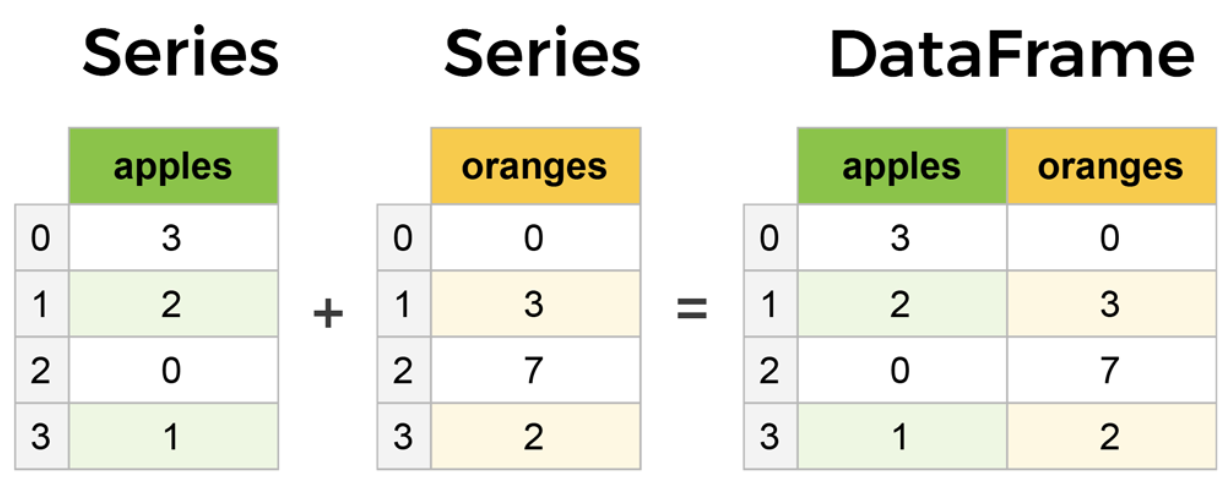

## Dataframe Axis

A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns.

Series object has only one axis, so this parameter always equals 0 for it. 


Now it’s clear that Series and DataFrame share the same direction for “axis 0” – it goes along rows direction.

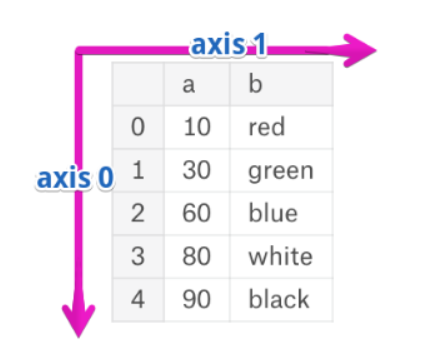

In [172]:
#import pandas
import pandas as pd

#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales_data_types.csv')
df.head()

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


##  Informasi DataFrame

```python
    dataframe.columns # daftar kolom pada dataframe 
    
    dataframe.info # informasi dataframe, kolom tipe data dsb.
    
    dataframe.shape # dimensi dataframe
    
    dataframe.size # jumlah data pada dataframe
    
```

### Hint for Class/Function 

Use:
```python 
help(type(dataframe.columns))
```

In [176]:
df.size

60

In [168]:
help(type(df.columns))

Help on class Index in module pandas.core.indexes.base:

class Index(pandas.core.base.IndexOpsMixin, pandas.core.base.PandasObject)
 |  Index(data=None, dtype=None, copy=False, name=None, tupleize_cols=True, **kwargs) -> 'Index'
 |  
 |  Immutable sequence used for indexing and alignment. The basic object
 |  storing axis labels for all pandas objects.
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : NumPy dtype (default: object)
 |      If dtype is None, we find the dtype that best fits the data.
 |      If an actual dtype is provided, we coerce to that dtype if it's safe.
 |      Otherwise, an error will be raised.
 |  copy : bool
 |      Make a copy of input ndarray.
 |  name : object
 |      Name to be stored in the index.
 |  tupleize_cols : bool (default: True)
 |      When True, attempt to create a MultiIndex if possible.
 |  
 |  See Also
 |  --------
 |  RangeIndex : Index implementing a monotonic integer range.
 |  CategoricalIndex : Index 

## Selecting and Filtering Data

### Mengambil baris dan kolom

#### Mengambil seluruh baris dari sebagian kolom (row slicing)

Caranya adalah:
``` python
dataframe['namakolom']
```

``` python
dataframe.namakolom
```
Untuk mencari nama kolom:

``` python
dataframe.columns
```

In [12]:
df.columns

Index(['Customer Number', 'Customer Name', 'Address', 'Type', 'Sales',
       'Percent Growth'],
      dtype='object')

In [182]:
list_kolom = ['Address', 'Type', 'Sales']
df[['Address', 'Type', 'Sales']]

,Address,Type,Sales
0,Jakarta,Company,Rp.162500000.00
1,Bandung,Company,"Rp101.200.000,00"
2,Jakarta,Perusahaan,62500000
3,"Pasteur, Bandung",Company,Rp4900000.00
4,"Cilincing, Jakarta",Company,Rp12750000.00
5,Bandung,Perusahaan,Rp 762500000
6,Depok,Personal,"Rp12,200,000.00"
7,Jakarta,Personal,50000000.00
8,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00
9,"Sleman, Jogjakarta",Individu,127450000


In [180]:
df.Type

0       Company
1       Company
2    Perusahaan
3       Company
4       Company
5    Perusahaan
6      Personal
7      Personal
8    Perusahaan
9      Individu
Name: Type, dtype: object

#### Mengambil seluruh kolom dari sebagian baris (columns slicing)
Caranya adalah
``` python
 dataframe[index]
```

In [183]:
df[0:5]

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


#### Mengambil sebagian baris pada sebagian kolom (row-column slicing)
Caranya adalah:

 ``` python
dataframe['namakolom']['index']
```

In [184]:
df['Customer Name'][0:4]

0     Quest Industry
1     Smith Plumbing
2    ACME Industrial
3         Brekke LTD
Name: Customer Name, dtype: object

### Menggunakan .loc
> Memilih baris atau kolom dengan label tertentu dari index.

```python
dataframe1.loc["kolom1", "kolom2"]

dataframe1.loc["kolom1":"value1", "kolom2":"value2"]
```


In [185]:
# kita akan coba mengakses sampai dengan index ke 4 (baris ke-5) 
# mulai dari Kolom 'Customer Name' s.d. kolom 'Type'
# dafarame.loc[row,column]
df.loc[:3, 'Customer Name':'Type']

,Customer Name,Address,Type
0,Quest Industry,Jakarta,Company
1,Smith Plumbing,Bandung,Company
2,ACME Industrial,Jakarta,Perusahaan
3,Brekke LTD,"Pasteur, Bandung",Company


### Menggunakan iloc

> Memilih baris atau kolom dengan label tertentu dari posisi index (integers).

```python
dataframe1.iloc[baris, kolom]

dataframe1.iloc[start:end (baris), start:end(kolom)]
```

In [187]:
# kita akan coba mengakses dari index ke-5 s.d. index ke-9 
# dari kolom 1 s.d. 5
df.iloc[5:10, 0:3]

,Customer Number,Customer Name,Address
5,565600,Berkah Jaya,Bandung
6,897440,Rafee Ahmad,Depok
7,123156,Reza Pratama,Jakarta
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta"
9,748952,Alexander Samiun,"Sleman, Jogjakarta"


### Filtering data

Cara pertama untuk melakukan filter adalah menggunakan ```conditional```.

```python
dataframe1[conditional] #yang nilainya true akan ditampilkan

```

Yang kedua menggunakan ```query```.

```python
df.query('20 < Age < 40')[:5]

```

In [190]:
#Contoh
df[df.Type != 'Personal']

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%
5,565600,Berkah Jaya,Bandung,Perusahaan,Rp 762500000,30.00%
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00,4.00%
9,748952,Alexander Samiun,"Sleman, Jogjakarta",Individu,127450000,-15.00%


In [202]:
df['Type'].value_counts()

Company       4
Perusahaan    3
Personal      2
Individu      1
Name: Type, dtype: int64

In [197]:
help(df.query)

Help on method query in module pandas.core.frame:

query(expr: 'str', inplace: 'bool' = False, **kwargs) method of pandas.core.frame.DataFrame instance
    Query the columns of a DataFrame with a boolean expression.
    
    Parameters
    ----------
    expr : str
        The query string to evaluate.
    
        You can refer to variables
        in the environment by prefixing them with an '@' character like
        ``@a + b``.
    
        You can refer to column names that are not valid Python variable names
        by surrounding them in backticks. Thus, column names containing spaces
        or punctuations (besides underscores) or starting with digits must be
        surrounded by backticks. (For example, a column named "Area (cm^2)" would
        be referenced as ```Area (cm^2)```). Column names which are Python keywords
        (like "list", "for", "import", etc) cannot be used.
    
        For example, if one of your columns is called ``a a`` and you want
        to sum it

In [198]:
df.query('Type == "Personal"')

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
6,897440,Rafee Ahmad,Depok,Personal,"Rp12,200,000.00",10.00%
7,123156,Reza Pratama,Jakarta,Personal,50000000.00,25


## Sorting Data

> Mengurutkan data berdasarkan valuenya.

Untuk melakukan sorting data pada DataFrame:
1. Hanya satu kolom:
```python
DataFrame.sort_values(by='', ascending=False)
```
2. Beberapa kolom:
```python
DataFrame.sort_values(["b", "c"], ascending = (False, True))
```

In [211]:
df.sort_values(by=["Type", "Customer Number"], ascending=(False, True))

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00,4.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
5,565600,Berkah Jaya,Bandung,Perusahaan,Rp 762500000,30.00%
7,123156,Reza Pratama,Jakarta,Personal,50000000.00,25
6,897440,Rafee Ahmad,Depok,Personal,"Rp12,200,000.00",10.00%
9,748952,Alexander Samiun,"Sleman, Jogjakarta",Individu,127450000,-15.00%
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


In [209]:
df[df.Address == 'Jakarta'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Number  3 non-null      int64 
 1   Customer Name    3 non-null      object
 2   Address          3 non-null      object
 3   Type             3 non-null      object
 4   Sales            3 non-null      object
 5   Percent Growth   3 non-null      object
dtypes: int64(1), object(5)
memory usage: 168.0+ bytes


In [212]:
#membuat koneksi ke database
import sqlalchemy
engine = sqlalchemy.create_engine("mysql://root@localhost:3306/titanic")

In [216]:
#melakukan query dengan pandas
query = "SELECT * FROM titanic_table WHERE embarked='S'"


df_sql = pd.read_sql(query, engine)
df_sql.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [218]:
df.Type.str.contains('Perusahaan')

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
9    False
Name: Type, dtype: bool

## Summarizing Data
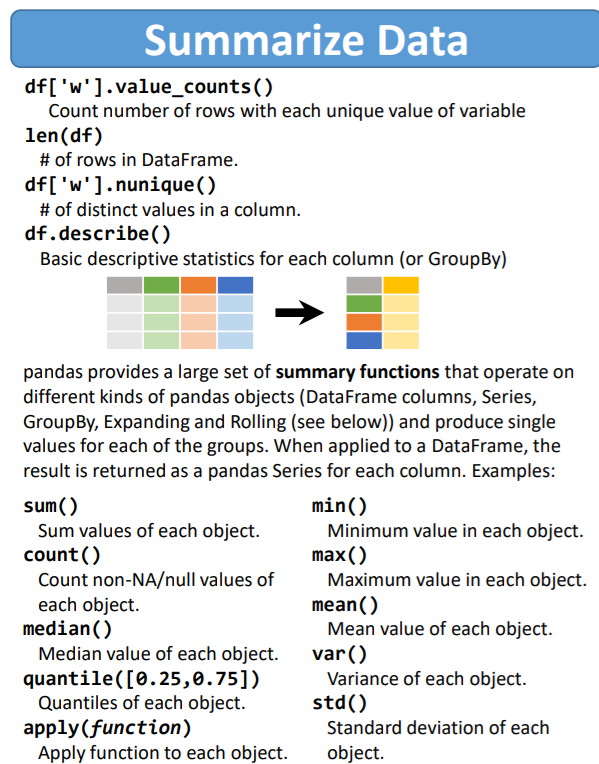

In [219]:
df.head()

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Number  10 non-null     int64 
 1   Customer Name    10 non-null     object
 2   Address          10 non-null     object
 3   Type             10 non-null     object
 4   Sales            10 non-null     object
 5   Percent Growth   10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [223]:
len(df)

10

In [226]:
df.nunique()

Customer Number    10
Customer Name      10
Address             7
Type                4
Sales              10
Percent Growth      5
dtype: int64

In [227]:
df.describe() #numerik

,Customer Number
count,10.000000
mean,426039.000000
std,290853.618133
min,100025.000000
25%,162295.000000
50%,400639.000000
75%,629671.750000
max,897440.000000


In [229]:
df.describe(include=['O'])

,Customer Name,Address,Type,Sales,Percent Growth
count,10,10,10,10,10
unique,10,7,4,10,5
top,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
freq,1,3,4,1,2


In [231]:
df.isna().sum()

Customer Number    0
Customer Name      0
Address            0
Type               0
Sales              0
Percent Growth     0
dtype: int64

In [233]:
df.Type.value_counts()

Company       4
Perusahaan    3
Personal      2
Individu      1
Name: Type, dtype: int64

In [239]:
df.groupby('Type').count()

,Customer Number,Customer Name,Address,Sales,Percent Growth
Type,,,,,
Company,4,4,4,4,4
Individu,1,1,1,1,1
Personal,2,2,2,2,2
Perusahaan,3,3,3,3,3


## String manipulations in Pandas

### Python String Method

- String merupakan tipe data "teks", didefinisikan dengan tanda kutip (' atau ").
- Jika menggunakan kutip dua " untuk definisi string, maka bisa digunakan kutip satu di dalam teks, begitu juga sebaliknya


Beberapa contoh string method di Python:

| Method       | Deskripsi                                                                                          |
|--------------|----------------------------------------------------------------------------------------------------|
| capitalize() | Ubah karakter pertama pada string menjadi kapital                                                  |
| find('str')       | Cari string di dalam suatu string, dengan outputnya adalah posisi indeks string tersebut ditemukan |
| lower()      | Mengubah semua karakter di string menjadi huruf kecil                                              |
| lstrip()     | Menghilangkan spasi berlebih pada bagian kiri string                                               |
| rstrip()     | Menghilangkan spasi berlebih pada bagian kanan string                                              |
| split('str')      | Memotong string pada karakter yang ditentukan, dan dioutput sebagai list                           |
| strip()      | Menghilangkan spasi berlebih pada semua sisi string                                                |
| swapcase()   | Mengganti huruf besar pada string menjadi kecil, dan sebaliknya                                    |
| title()      | Mengubah huruf pertama pada tiap kata didalam string sebagai huruf kapital                         |
| upper()      | Mengubah semua karakter di string menjadi huruf besar           

In [241]:
#Contoh
buah = 'pepaya'
type(buah)

str

In [244]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [245]:
buah.capitalize()

'Pepaya'

In [247]:
buah.split('pa')

['pe', 'ya']

In [248]:
makanan = " ayam geprek pak bos "

In [252]:
makanan.split(" ")

['', 'ayam', 'geprek', 'pak', 'bos', '']

In [255]:
makanan2 = makanan.strip()
makanan2

'ayam geprek pak bos'

In [256]:
makanan2.split(" ")

['ayam', 'geprek', 'pak', 'bos']

In [260]:
makanan2.find('geprek')

5

In [261]:
makanan2[5:11]

'geprek'

#### Latihan Python String Method

In [17]:
# buatlah semua karakter dalam string menjadi huruf kecil
text = 'LIveRpoOl is ThE BeSt PrEmiEr LeAgUe TeAm'

#Jawaban



In [18]:
# buatlah karakter pada setiap awal kata menjadi huruf kapital
text = 'LIveRpoOl is ThE BeSt PrEmiEr LeAgUe TeAm'

#Jawaban



In [19]:
# gunakanlah method .split() pada string berikut, pisahkan apabila terdapat spasi
text = 'LIveRpoOl is ThE BeSt PrEmiEr LeAgUe TeAm'

#Jawaban



### Tipe Data Teks di Pandas

Data teks disimpan di Pandas dalam format Object atau String.
Di Pandas, apabila menyimpan string menjadi series/dataframe otomatis menjadi tipe data `Object'

In [262]:
list1 = ["1", "2", "3"]
pd.Series(list1)

0    1
1    2
2    3
dtype: object

In [263]:
#untuk membuat tipe datanya string dari series, diberikan argumen dtype 
list1 = ["1", "2", "3"]
pd.Series(list1, dtype="string")

0    1
1    2
2    3
dtype: string

#### Konversi tipe data di Pandas

In [269]:
import numpy as np
s = pd.Series(["1", "2", "3", np.nan])
s

0      1
1      2
2      3
3    NaN
dtype: object

In [267]:
#konversi menjadi tipe data string
s2 = s.astype("string")
s2

0       1
1       2
2       3
3    <NA>
dtype: string

In [272]:
#konversi menjadi tipe data int64
s_int = s.astype("Int64")
s_int

0       1
1       2
2       3
3    <NA>
dtype: Int64

### Pandas String Method

`Series` memiliki beberapa fungsi dasar yang mempermudah proses manipulasi string pada setiap elemen array.  Data kosong / NA otomatis dikecualikan.

Syntax: `NamaSeries.str.Method()`

String method di Pandas mirip dengan di Python secara umum, antara lain:


| Method       | Deskripsi                                                                                          |
|--------------|----------------------------------------------------------------------------------------------------|
| upper()      | Mengubah semua karakter di string menjadi huruf besar                                              |
| lower()      | Mengubah semua karakter di string menjadi huruf kecil                                              |
| len()        | Menghitung jumlah karakter di suatu string                                                         |
| isdigit()    | Menentukan apakah semua karakter merupakan suatu digit                                             |
| match('str')      | Menentukan apakah suatu pola dapat ditemukan pada suatu string                                     |
| lstrip()     | Menghilangkan spasi berlebih pada bagian kiri string                                               |
| rstrip()     | Menghilangkan spasi berlebih pada bagian kanan string                                              |
| strip()      | Menghilangkan spasi berlebih pada semua sisi string                                                |
| split('str')      | Memotong string pada karakter yang ditentukan, dan dioutput sebagai list                           |
| replace('str','str-ganti')      | Mengganti karakter                           |
| contains('str')      | Mencari karakter                           |

In [273]:
df.head()

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


In [301]:
lowercase = df.Address.str.lower()
lowercase

0                    jakarta
1                    bandung
2                    jakarta
3           pasteur, bandung
4         cilincing, jakarta
5                    bandung
6                      depok
7                    jakarta
8    kebayoran lama, jakarta
9         sleman, jogjakarta
Name: Address, dtype: object

In [302]:
cap = df.Address.str.capitalize()
cap

0                    Jakarta
1                    Bandung
2                    Jakarta
3           Pasteur, bandung
4         Cilincing, jakarta
5                    Bandung
6                      Depok
7                    Jakarta
8    Kebayoran lama, jakarta
9         Sleman, jogjakarta
Name: Address, dtype: object

In [276]:
df.Address.str.upper()

0                    JAKARTA
1                    BANDUNG
2                    JAKARTA
3           PASTEUR, BANDUNG
4         CILINCING, JAKARTA
5                    BANDUNG
6                      DEPOK
7                    JAKARTA
8    KEBAYORAN LAMA, JAKARTA
9         SLEMAN, JOGJAKARTA
Name: Address, dtype: object

In [283]:
seri = pd.Series([100, "Reza", "2022", "Agustus", "Reza2"], dtype="string")
seri

0        100
1       Reza
2       2022
3    Agustus
4      Reza2
dtype: string

In [278]:
seri.str.isdigit() #cek apakah numerik

0     True
1    False
2     True
3    False
dtype: boolean

In [281]:
seri.str.contains('eza')

0    False
1     True
2    False
3    False
dtype: boolean

In [284]:
seri.str.match('Reza')

0    False
1     True
2    False
3    False
4     True
dtype: boolean

In [285]:
df.head()

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


In [287]:
df[df.Address.str.contains('Jakarta')]

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%
7,123156,Reza Pratama,Jakarta,Personal,50000000.00,25
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00,4.00%


In [290]:
df[df['Customer Name'].str.match('S')]

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%


In [291]:
df

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%
5,565600,Berkah Jaya,Bandung,Perusahaan,Rp 762500000,30.00%
6,897440,Rafee Ahmad,Depok,Personal,"Rp12,200,000.00",10.00%
7,123156,Reza Pratama,Jakarta,Personal,50000000.00,25
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00,4.00%
9,748952,Alexander Samiun,"Sleman, Jogjakarta",Individu,127450000,-15.00%


In [294]:
df['Type'] = df['Type'].replace('Individu','Personal')

In [296]:
df

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%
5,565600,Berkah Jaya,Bandung,Perusahaan,Rp 762500000,30.00%
6,897440,Rafee Ahmad,Depok,Personal,"Rp12,200,000.00",10.00%
7,123156,Reza Pratama,Jakarta,Personal,50000000.00,25
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00,4.00%
9,748952,Alexander Samiun,"Sleman, Jogjakarta",Personal,127450000,-15.00%


In [329]:
#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales_data_types.csv')
df.head()

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


In [330]:
df['Sales'] = df['Sales'].str.replace('Rp','')
df['Percent Growth'] = df['Percent Growth'].str.replace('%','')
df['Percent Growth']

0     30.00
1     10.00
2        25
3      4.00
4    -15.00
5     30.00
6     10.00
7        25
8      4.00
9    -15.00
Name: Percent Growth, dtype: object

## Pandas Lambda Functions
Menggunakan fungsi Lambda pada Pandas, berguna untuk mempersingkat kode dalam melakukan transformasi data di dalam dataframe

In [335]:
#Dataset yang digunakan
# creating and initializing a list
values= [['Reza',90,90],['Rizky',100,90],['Pratama',100,80],
         ['Ade',95,85],['Satya',100,100],['Wahana',90,85]]
 
# creating a pandas dataframe
df_lambda = pd.DataFrame(values,columns=['Name','Nilai_Mtk','Nilai_Fisika'])
df_lambda

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,90,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


### Menggunakan lambda function di kolom dengan Dataframe.assign()

In [332]:
data2 = df_lambda.assign(Nilai_Total=lambda x: (x['Nilai_Mtk'] + x['Nilai_Fisika']))
data2

,Name,Nilai_Mtk,Nilai_Fisika,Nilai_Total
0,Reza,90,90,180
1,Rizky,100,90,190
2,Pratama,100,80,180
3,Ade,95,85,180
4,Satya,100,100,200
5,Wahana,90,85,175


In [334]:
df_lambda['Nilai_Total'] = df_lambda['Nilai_Mtk'] + df_lambda['Nilai_Fisika']
df_lambda

,Name,Nilai_Mtk,Nilai_Fisika,Nilai_Total
0,Reza,90,90,180
1,Rizky,100,90,190
2,Pratama,100,80,180
3,Ade,95,85,180
4,Satya,100,100,200
5,Wahana,90,85,175


### Menggunakan lambda function di baris dengan Dataframe.apply()

In [347]:
#Dataset yang digunakan
# creating and initializing a list
values= [['Reza',90,90],['Rizky',100,90],['Pratama',100,80],
         ['Ade',95,85],['Satya',100,100],['Wahana',90,85]]
 
# creating a pandas dataframe
df_lambda = pd.DataFrame(values,columns=['Name','Nilai_Mtk','Nilai_Fisika'])
df_lambda

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,90,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


In [337]:
df_lambda['Nilai_Mtk'] = df_lambda['Nilai_Mtk'].apply(lambda x: x*10)
df_lambda

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,900,90
1,Rizky,1000,90
2,Pratama,1000,80
3,Ade,950,85
4,Satya,1000,100
5,Wahana,900,85


In [341]:
def sepuluhx(x):
    return x*10

In [342]:
print(sepuluhx(10))

100


In [343]:
df_lambda['Nilai_Mtk'] = df_lambda['Nilai_Mtk'].apply(sepuluhx)

In [344]:
df_lambda

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,9000,90
1,Rizky,10000,90
2,Pratama,10000,80
3,Ade,9500,85
4,Satya,10000,100
5,Wahana,9000,85


In [354]:
def reza10(row):
    if row[0] == 'Reza':
        return row[1] + 10
    else:
        return row[1]

In [355]:
reza10(['Reza',90])

100

In [358]:
data3 = df_lambda.copy()
data3['Nilai_Mtk'] = data3[['Name', 'Nilai_Mtk']].apply(reza10, axis=1)
data3

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,100,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


In [352]:
df_lambda

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,90,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


In [353]:
# apabila namanya reza, maka nilainya ditambah 10
data4 = df_lambda.copy()
data4['Nilai_Mtk'] = data4[['Name', 'Nilai_Mtk']].apply(lambda x: x['Nilai_Mtk']+10 if x['Name'] == 'Reza' 
                                                        else x['Nilai_Mtk'], axis=1)
data4

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,100,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


### Latihan Lambda

In [28]:
#Data menggunakan df_lambda
#Menggunakan asssign, buat kolom yang berisi nilai rata-rata dari MTK & Fisika



In [29]:
#Data menggunakan df_lambda
#Menggunakan apply, apabila orang tersebut bernama "Ade" maka nilai MTK ditambah 10, selain ade dikurangi 10



## Saving Data

Untuk menyimpan dataframe kita ke sebuah file dapa digunakan beberapa fungsi seperti

``` python
dataframe.to_csv('namafile')
dataframe.to_excel('namafile')
```

In [369]:
data4

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,100,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


In [376]:
data4.to_csv('nilai_ujian.csv', index=False, sep='|')

In [378]:
nilai = pd.read_csv('nilai_ujian.csv', sep='|')
nilai

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,100,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


## Latihan 

1. Gunakan dataset 'sales_data_latihan.csv'
https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales_data_latihan.csv
2. Perbaiki format data:
- Kolom sales seharusnya numerik (hapus Rp)
- Kolom "Percent Growth" seharusnya numerik (tanpa tanda %)
- Hilangkan spasi berlebih pada kolom Type 
3. Buat laporan:
- Jumlah Sales Berdasarkan Tipe
- Ambil 3 customer dengan kenaikan tertinggi

In [321]:
#load dataset
df_latihan = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales_data_latihan.csv')
df_latihan.head()

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,"Kebayoran Lama, Jakarta",Company,Rp162500000,30.00%
1,552278,Smith Plumbing,"Pasteur, Bandung",Company,Rp101200000,10.00%
2,234775,ACME Industrial,"Kebayoran Lama, Jakarta",Perusahaan,62500000,NaN
3,249000,Brekke LTD,"Pasteur, Bandung",Company,4900000,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000,-15.00%


# Data Cleaning

## Memahami Tipe Data

Sekilas tentang Tipe Data di Pandas 

|Pandas dtype|Python type|NumPy type|Usage|
|--- |--- |--- |---|
|object|str or mixed|string_, unicode_, mixed types|Text or mixed numeric and non-numeric values|
|int64|int|int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64|Integer numbers|
|float64|float|float_, float16, float32, float64|Floating point numbers|
|bool|bool|bool_|True/False values|
|datetime64|NA|datetime[ns]|Date and time values|
|timedelta[ns]|NA|NA|Differences between two datetimes|
|category|NA|NA|Finite list of text values|

## Memperbaiki Data

Seringkali dataset yang kita peroleh format datanya masih tidak sesuai dengan yang diharapkan, misalnya ada kolom yang berisi nilai uang namun dianggap sebagai string karena ada simbol mata uang di depannya. 

Ada juga mengenai data yang disajikan tidak konsisten.


__Contoh Kasus:__

In [379]:
# Load file menjadi dataset
# Diberi nama df_case1

df_case1 = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales_data_types.csv')
df_case1

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%
5,565600,Berkah Jaya,Bandung,Perusahaan,Rp 762500000,30.00%
6,897440,Rafee Ahmad,Depok,Personal,"Rp12,200,000.00",10.00%
7,123156,Reza Pratama,Jakarta,Personal,50000000.00,25
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000.00,4.00%
9,748952,Alexander Samiun,"Sleman, Jogjakarta",Individu,127450000,-15.00%


In [380]:
# mengecek jenis tipe data
# dapat dilihat bahwa mayoritas data bertipe object
df_case1.dtypes

Customer Number     int64
Customer Name      object
Address            object
Type               object
Sales              object
Percent Growth     object
dtype: object

In [381]:
# Melakukan pengecekan lebih dalam terkait tipe data
# Bahwa ada tipe data yang tercampur di kolom Customer Number, Customer Name, Address, dan Type
df_case1.applymap(type).apply(pd.Series.value_counts)

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
<class 'int'>,10.0,NaN,NaN,NaN,NaN,NaN
<class 'str'>,NaN,10.0,10.0,10.0,10.0,10.0


**Penanganan:**

In [382]:
# Customer Number menjadi string 
df_case1['Customer Number'] = df_case1['Customer Number'].astype(str)

In [34]:
# Untuk kolom Sales, Percent Growth, Addres
# Perlu melakukan pengecekan terkait konsistensi penulisan
# Atas pemahaman tersebut, baru dilakukan pilihan penanganan

# Sales menjadi float64 
# (1) penulisan Rp, (2) penulisan titik koma, dan (3) penulisan ,00
df_case1['Sales'] = df_case1['Sales'].str.replace('(Rp|Rp\.|IDR )','', regex=True)
df_case1['Sales'] = df_case1['Sales'].str.replace('[\.,](\d{3})','\\1', regex=True)
df_case1['Sales'] = df_case1['Sales'].str.replace(',00','.00', regex=True)
df_case1['Sales'] = df_case1['Sales'].astype(float)

In [35]:
# Percent Growth menjadi float64 
# Tanda % dihilangkan
df_case1['Percent Growth'] = df_case1['Percent Growth'].str.replace('%','', regex=False)
df_case1['Percent Growth'] = df_case1['Percent Growth'].astype(float)

In [36]:
# Hanya mengambil Kota saja, info atas detail alamat dihilangkan
df_case1['Address'] = df_case1['Address'].str.replace('\D+,','', regex=True)

In [37]:
# Sedangkan untuk kolom Type
# Melakukan penyesuaian atas konsisten penulisan kategoriny
# Merubah penulisan Company dan Individu
df_case1['Type'] = df_case1['Type'].replace({'Company':'Perusahaan','Individu':'Personal'})

In [38]:
# print dataset setelah penanganan
df_case1

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Perusahaan,162500000.0,30.0
1,552278,Smith Plumbing,Bandung,Perusahaan,101200000.0,10.0
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000.0,NaN
3,249000,Brekke LTD,Bandung,Perusahaan,4900000.0,4.0
4,651029,Harbor Co,Jakarta,Perusahaan,12750000.0,-15.0
5,565600,Berkah Jaya,Bandung,Perusahaan,762500000.0,30.0
6,897440,Rafee Ahmad,Depok,Personal,12200000.0,10.0
7,123156,Reza Pratama,Jakarta,Personal,50000000.0,25.0
8,138135,PT Berdikari,Jakarta,Perusahaan,9000000.0,4.0
9,748952,Alexander Samiun,Jogjakarta,Personal,127450000.0,-15.0


In [39]:
# print type setelah penanganan
df_case1.dtypes

Customer Number     object
Customer Name       object
Address             object
Type                object
Sales              float64
Percent Growth     float64
dtype: object

## Memperbaiki Bentuk DataFrame

Selain tipe data, bentuk dataset yang kita punya/peroleh juga kadang bermasalah. 

Dalam hal ini, kita harus memperbaiki dulu untuk membuatnya mudah dianalisis.

__Contoh Kasus:__

In [383]:
# Load file menjadi dataset
# Diberi nama df_case2

df_case2 = pd.read_excel('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales.xlsx')
df_case2.head(5)

# Disini akan terlihat di awal kalau kolom sangat membingungkan

,Ship Mode,First Class,Unnamed: 2,Unnamed: 3,Same Day,Unnamed: 5,Unnamed: 6,Second Class,Unnamed: 8,Unnamed: 9,Standard Class,Unnamed: 11,Unnamed: 12
0,Segment,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office
1,Order Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056
3,2013-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,129.44,NaN,NaN,NaN,NaN,NaN
4,2013-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.47,NaN,NaN


In [384]:
# Kita menggunakan dua baris teratas sebagai header
df_case2 = pd.read_excel('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales.xlsx'
                         , header=[0, 1])
df_case2.head(5)

Ship Mode First Class                       Same Day            \
               Segment    Consumer Corporate Home Office Consumer Corporate   
0           Order Date         NaN       NaN         NaN      NaN       NaN   
1  2013-03-14 00:00:00         NaN       NaN         NaN      NaN       NaN   
2  2013-12-16 00:00:00         NaN       NaN         NaN      NaN       NaN   
3  2013-06-02 00:00:00         NaN       NaN         NaN      NaN       NaN   
4  2013-10-21 00:00:00         NaN       NaN         NaN      NaN       NaN   

              Second Class                       Standard Class            \
  Home Office     Consumer Corporate Home Office       Consumer Corporate   
0         NaN          NaN       NaN         NaN            NaN       NaN   
1         NaN          NaN       NaN         NaN            NaN       NaN   
2         NaN       129.44       NaN         NaN            NaN       NaN   
3         NaN          NaN       NaN         NaN         605.47       NaN   
4         NaN          NaN       NaN         NaN            NaN    788.86   

               
  Home Office  
0         NaN  
1      91.056  
2         NaN  
3         NaN  
4         NaN

Terlihat lebih baik, namun masih perlu diperbaiki

In [385]:
# Hapus baris ke 0, karena baris Order Date tidak memberikan value lebih
# Menggunakan fungsi .iloc[]
df_case2 = df_case2.iloc[1:]
df_case2.head(3)

Ship Mode First Class                       Same Day            \
               Segment    Consumer Corporate Home Office Consumer Corporate   
1  2013-03-14 00:00:00         NaN       NaN         NaN      NaN       NaN   
2  2013-12-16 00:00:00         NaN       NaN         NaN      NaN       NaN   
3  2013-06-02 00:00:00         NaN       NaN         NaN      NaN       NaN   

              Second Class                       Standard Class            \
  Home Office     Consumer Corporate Home Office       Consumer Corporate   
1         NaN          NaN       NaN         NaN            NaN       NaN   
2         NaN       129.44       NaN         NaN            NaN       NaN   
3         NaN          NaN       NaN         NaN         605.47       NaN   

               
  Home Office  
1      91.056  
2         NaN  
3         NaN

__Ilustrasi Melt__

<img src="ezgif-7-9d489369623a.gif"/>

In [394]:
df_case2.columns

MultiIndex([(     'Ship Mode',     'Segment'),
            (   'First Class',    'Consumer'),
            (   'First Class',   'Corporate'),
            (   'First Class', 'Home Office'),
            (      'Same Day',    'Consumer'),
            (      'Same Day',   'Corporate'),
            (      'Same Day', 'Home Office'),
            (  'Second Class',    'Consumer'),
            (  'Second Class',   'Corporate'),
            (  'Second Class', 'Home Office'),
            ('Standard Class',    'Consumer'),
            ('Standard Class',   'Corporate'),
            ('Standard Class', 'Home Office')],
           )

In [388]:
# Pandas menyediakan fungsi .melt()
# .melt() melakukan unpivot dengan membuat wide dataframe menjadi long dataframe
# Variable menggunakan kolom dengan index 0, Ship Mode dan Segment
df_case2_melted = df_case2.melt(id_vars=[df_case2.columns[0]])
df_case2_melted.sample(5)

,"(Ship Mode, Segment)",variable_0,variable_1,value
852,2013-10-11,First Class,Corporate,NaN
1909,2014-11-30,First Class,Home Office,NaN
9548,2016-10-02,Standard Class,Home Office,NaN
570,2016-05-14,First Class,Consumer,NaN
9721,2016-11-17,Standard Class,Home Office,NaN


In [391]:
df_case2_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   (Ship Mode, Segment)  9864 non-null   datetime64[ns]
 1   variable_0            9864 non-null   object        
 2   variable_1            9864 non-null   object        
 3   value                 822 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 308.4+ KB


In [392]:
# Hapus kolom value yang kosong
df_case2_melted.dropna(subset=['value'], inplace=True)
df_case2_melted.reindex()

# Sesuaikan penamaan kolom
df_case2_melted.columns = ['Order Date','Shiping Method', 'Consumer Type','Value']

In [393]:
df_case2_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 11 to 9851
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      822 non-null    datetime64[ns]
 1   Shiping Method  822 non-null    object        
 2   Consumer Type   822 non-null    object        
 3   Value           822 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 32.1+ KB


In [45]:
# Print dataframe setelah penanganan
df_case2_melted.sample(3)

,Order Date,Shiping Method,Consumer Type,Value
1258,2015-08-27,First Class,Corporate,31.008
8935,2014-03-24,Standard Class,Corporate,6.992
7614,2014-11-13,Standard Class,Consumer,233.064


> Kasus seperti ini pastinya akan sering terjadi. Contoh di atas bukan resep satu untuk semua karena kasus masing-masing unik. Pandas menyediakan beberapa fungsi untuk menangani permasalahan bentuk dataset yang bermasalah. Anda bisa mengecek beberapa fungsi seperti [reshape](https://pandas.pydata.org/docs/user_guide/reshaping.html), [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) dsb.

## Menggabungkan Dua DataFrame 

Jika kita memiliki data yang tersebar ke dalam beberapa atau banyak file dan ingin menganalisisnya secara gabungan. 

Pandas menyediakan berbagai metode untuk menggabungkan dataframe seperti ```.join()``` dan ```.concat()```.

__Contoh Kasus:__

Sumber: https://data.jakarta.go.id/

In [401]:
# Load file satu menjadi dataset
# Diberi nama df_case_bumd2017

df_case_bumd2017 = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/bumd2017.csv')
df_case_bumd2017

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
100,2017,PT Grahasari Suryajaya,Aset,328730722,Data tidak tersedia
101,2017,PT Grahasari Suryajaya,Ekuitas,123856419,Data tidak tersedia
102,2017,PT Grahasari Suryajaya,Pendapatan Usaha,67104107,Data tidak tersedia
103,2017,PT Grahasari Suryajaya,Laba Usaha,428926,Data tidak tersedia


In [396]:
# Load file dua menjadi dataset
# Diberi nama df_case_bumd2018
df_case_bumd2018 = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/bumd2018.csv')
df_case_bumd2018

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2018,PD AM Jaya,Aset,1.487470e+09,NaN
1,2018,PD AM Jaya,Ekuitas,-3.099618e+08,NaN
2,2018,PD AM Jaya,Pendapatan Usaha,2.902988e+09,NaN
3,2018,PD AM Jaya,Laba Usaha,1.787775e+08,NaN
4,2018,PD AM Jaya,Laba Bersih,1.995425e+08,NaN
...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.


#### [Concatenate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

<img src="https://static.javatpoint.com/tutorial/numpy/images/numpy-concatenate.png">

In [398]:
pd.concat([df_case_bumd2017, df_case_bumd2018],axis=0)

,tahun,nama_bumd,nama_akun,nilai,keterangan,tambah
0,2017,PD AM Jaya,Aset,1360142767,NaN,1.0
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN,1.0
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN,1.0
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN,1.0
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN,1.0
...,...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.,NaN
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.,NaN
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.,NaN
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.,NaN


#### [Append](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [399]:
df_case_bumd2017.append(df_case_bumd2018)

C:\Users\reza.pratama\AppData\Local\Temp\ipykernel_26276\3877724355.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,tahun,nama_bumd,nama_akun,nilai,keterangan,tambah
0,2017,PD AM Jaya,Aset,1360142767,NaN,1.0
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN,1.0
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN,1.0
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN,1.0
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN,1.0
...,...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.,NaN
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.,NaN
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.,NaN
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.,NaN


#### [Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

<img src="https://www.absentdata.com/wp-content/uploads/2019/07/pd.merge-1.png">

In [402]:
# Buat dataframe skenario 1
# Copy dari df_case_bumd2017, diberi nama df_case_bumd2017_laba
df_case_bumd2017_laba = df_case_bumd2017[df_case_bumd2017.nama_akun == 'Laba Bersih'].copy()

# Drop kolom nama_akun, keterangan, dan tahun
df_case_bumd2017_laba.drop(columns=['nama_akun','keterangan','tahun'], inplace=True)

# Rename kolom menjadi nama_bumd dan nilai2017
# Simpan dalam bentuk file .csv
df_case_bumd2017_laba.columns = ['nama_bumd', 'nilai2017']
df_case_bumd2017_laba.to_csv('bumd_laba_2017.csv')

df_case_bumd2017_laba

,nama_bumd,nilai2017
4,PD AM Jaya,131375112
9,PD Dharma Jaya,-
14,PD Pasar Jaya,93518089
19,PD Pembangunan Sarana Jaya,119436680
24,PD PAL Jaya,39174547
29,PT Food Station Tjipinang Jaya,16238344
34,PT Jakarta Propertindo,478427550
39,PT Bank DKI,712177000
44,PT Jakarta Tourisindo,-19723289
49,PT Mass Rapid Transit (MRT) Jakarta,-116894593


In [403]:
# Buat dataframe skenario 2
# Copy dari df_case_bumd2018, diberi nama df_case_bumd2018_laba
df_case_bumd2018_laba = df_case_bumd2018[df_case_bumd2018.nama_akun == 'Laba Bersih'].copy()

# Drop kolom nama_akun, keterangan, dan tahun
df_case_bumd2018_laba.drop(columns=['nama_akun','keterangan','tahun'], inplace=True)

# Rename kolom menjadi nama_bumd dan nilai2018
# Simpan dalam bentuk file .csv
df_case_bumd2018_laba.columns = ['nama_bumd', 'nilai2018']
df_case_bumd2018_laba.to_csv('bumd_laba_2018.csv')
df_case_bumd2018_laba

,nama_bumd,nilai2018
4,PD AM Jaya,1.995425e+08
9,PD Dharma Jaya,1.454401e+07
14,PD PAL Jaya,4.273300e+07
19,Perumda Pasar Jaya,9.873328e+07
24,Perumda Pembangunan Sarana Jaya,1.765353e+08
29,PT Asuransi Bangun Askrida,1.779958e+08
34,PT Bank DKI,8.003070e+08
39,PT Cemani Toka,4.081731e+06
44,"PT Delta Djakarta, Tbk",3.381300e+08
49,PT Food Station Tjipinang Jaya,3.023541e+07


In [404]:
# Print hasil skenario 1
df_case_bumd2017_laba.sample(3)

,nama_bumd,nilai2017
49,PT Mass Rapid Transit (MRT) Jakarta,-116894593
29,PT Food Station Tjipinang Jaya,16238344
64,PT Jakarta Industrial Estate Pulogadung (Persero),85894997


In [405]:
# Print hasil skenario 2
df_case_bumd2018_laba.sample(3)

,nama_bumd,nilai2018
54,PT Grahasari Suryajaya,NaN
19,Perumda Pasar Jaya,98733280.97
109,PT Ratax Armada,NaN


In [408]:
# .merge() bisa melakukan setting parameter atas kolom yang di merge dan metode mergenya
# Contoh kasus ini menggunakan metode inner
df_case_bumd2017_laba.merge(df_case_bumd2018_laba, left_on='nama_bumd', right_on='nama_bumd', how="inner").head(10)

,nama_bumd,nilai2017,nilai2018
0,PD AM Jaya,131375112,1.995425e+08
1,PD Dharma Jaya,-,1.454401e+07
2,PD PAL Jaya,39174547,4.273300e+07
3,PT Food Station Tjipinang Jaya,16238344,3.023541e+07
4,PT Bank DKI,712177000,8.003070e+08
5,PT Jakarta Tourisindo,-19723289,-1.545650e+07
6,PT Transportasi Jakarta,261897622,NaN
7,PT Jamkrida Jakarta,4262414,8.730033e+06
8,PT Jakarta Industrial Estate Pulogadung (Persero),85894997,1.162282e+08
9,PT Pembangunan Jaya,1490103079,1.507277e+09


#### [Join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join)

<img src="https://storage.googleapis.com/kotakode-prod-public/images/b41cac0f-e745-4696-a890-d5f709cc6d7f-join.jpg">


In [409]:
# Join ke kanan berdasarkan index
# Kita beri tambahan nama, agar membedakan antara skenario 1 dan skenario 2
df_case_bumd2017_laba.join(df_case_bumd2018_laba, lsuffix='_caller', rsuffix='_other').head(10)

,nama_bumd_caller,nilai2017,nama_bumd_other,nilai2018
4,PD AM Jaya,131375112,PD AM Jaya,1.995425e+08
9,PD Dharma Jaya,-,PD Dharma Jaya,1.454401e+07
14,PD Pasar Jaya,93518089,PD PAL Jaya,4.273300e+07
19,PD Pembangunan Sarana Jaya,119436680,Perumda Pasar Jaya,9.873328e+07
24,PD PAL Jaya,39174547,Perumda Pembangunan Sarana Jaya,1.765353e+08
29,PT Food Station Tjipinang Jaya,16238344,PT Asuransi Bangun Askrida,1.779958e+08
34,PT Jakarta Propertindo,478427550,PT Bank DKI,8.003070e+08
39,PT Bank DKI,712177000,PT Cemani Toka,4.081731e+06
44,PT Jakarta Tourisindo,-19723289,"PT Delta Djakarta, Tbk",3.381300e+08
49,PT Mass Rapid Transit (MRT) Jakarta,-116894593,PT Food Station Tjipinang Jaya,3.023541e+07


In [55]:
# Join ke bawah
# Kolom yang kita join adalah nama_bumd
# Akan ada NaN karena nilai 2017 hanya ada di kolom dia, begitu juga dengan nilai 2018
df_case_bumd2017_laba.join(df_case_bumd2018_laba.set_index('nama_bumd'), on='nama_bumd').head(3)

,nama_bumd,nilai2017,nilai2018
4,PD AM Jaya,131375112,1.995425e+08
9,PD Dharma Jaya,-,1.454401e+07
14,PD Pasar Jaya,93518089,NaN


## Menghapus Duplicate Data

Menghapus data duplikat menggunakan fungsi [.drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).

__Contoh Kasus:__

Kita akan gunakan data dari contoh sebelumnya.

> keep = {‘first’, ‘last’, False}

In [411]:
df_case_bumd2017.groupby('nama_bumd').count()

,tahun,nama_akun,nilai,keterangan
nama_bumd,,,,
PD AM Jaya,5,5,5,0
PD Dharma Jaya,5,5,5,5
PD PAL Jaya,5,5,5,0
PD Pasar Jaya,5,5,5,0
PD Pembangunan Sarana Jaya,5,5,5,0
PT Asuransi Bangun Askrida,5,5,5,0
PT Bank DKI,5,5,5,0
PT Cemani Toka,5,5,5,0
PT Food Station Tjipinang Jaya,5,5,5,0


In [412]:
help(df.drop_duplicates())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If

In [415]:
# parameter 'first' artinya akan menyimpan nilai pertama kali ditemukan, jika ada yang duplicate
df_case_bumd2017_drop_duplicate = df_case_bumd2017.drop_duplicates(subset=['nama_bumd'],keep='first')
df_case_bumd2017_drop_duplicate

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
5,2017,PD Dharma Jaya,Aset,-,Data belum tersedia
10,2017,PD Pasar Jaya,Aset,4383249995,NaN
15,2017,PD Pembangunan Sarana Jaya,Aset,1455160903,NaN
20,2017,PD PAL Jaya,Aset,716222145,NaN
25,2017,PT Food Station Tjipinang Jaya,Aset,561170417,NaN
30,2017,PT Jakarta Propertindo,Aset,16712835675,NaN
35,2017,PT Bank DKI,Aset,51417045000,NaN
40,2017,PT Jakarta Tourisindo,Aset,518225594,NaN
45,2017,PT Mass Rapid Transit (MRT) Jakarta,Aset,9781841615,NaN


## Menghapus Missing Data

Menghapus missing data bisa menggunakan fungsi ```.dropna()```. 

__Contoh Kasus:__

Kita akan gunakan data dari contoh sebelumnya.

In [416]:
df_case_bumd2017

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
100,2017,PT Grahasari Suryajaya,Aset,328730722,Data tidak tersedia
101,2017,PT Grahasari Suryajaya,Ekuitas,123856419,Data tidak tersedia
102,2017,PT Grahasari Suryajaya,Pendapatan Usaha,67104107,Data tidak tersedia
103,2017,PT Grahasari Suryajaya,Laba Usaha,428926,Data tidak tersedia


In [417]:
df_case_bumd2017.dropna(subset=['keterangan']).sample(3)

,tahun,nama_bumd,nama_akun,nilai,keterangan
100,2017,PT Grahasari Suryajaya,Aset,328730722,Data tidak tersedia
87,2017,PT Jakarta International Expo,Pendapatan Usaha,-,Data belum tersedia
51,2017,PT Transportasi Jakarta,Ekuitas,2610706215,Unaudited 2017


In [420]:
df_case_bumd2017

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
100,2017,PT Grahasari Suryajaya,Aset,328730722,Data tidak tersedia
101,2017,PT Grahasari Suryajaya,Ekuitas,123856419,Data tidak tersedia
102,2017,PT Grahasari Suryajaya,Pendapatan Usaha,67104107,Data tidak tersedia
103,2017,PT Grahasari Suryajaya,Laba Usaha,428926,Data tidak tersedia


In [427]:
df_case_bumd2017.drop('keterangan', axis=1)

,tahun,nama_bumd,nama_akun,nilai
0,2017,PD AM Jaya,Aset,1360142767
1,2017,PD AM Jaya,Ekuitas,-509895627
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019
3,2017,PD AM Jaya,Laba Usaha,122739741
4,2017,PD AM Jaya,Laba Bersih,131375112
...,...,...,...,...
100,2017,PT Grahasari Suryajaya,Aset,328730722
101,2017,PT Grahasari Suryajaya,Ekuitas,123856419
102,2017,PT Grahasari Suryajaya,Pendapatan Usaha,67104107
103,2017,PT Grahasari Suryajaya,Laba Usaha,428926


> Penanganan missing value sedikit lebih kompleks ketika melakukan analisis data __(tidak sekedar menghapus)__. Hal ini akan dibahas nanti di kasus titanic.

## Membuat Rekapitulasi Data

In [58]:
# Penting untuk membuat resume atas data sebagai tambahan understanding kita
# Kita akan melakukan grouping dari df_case2_melted
# Menggunakan fungsi Sum, Count dan Mean sebagai value
df_case_group1 = df_case2_melted.groupby(by=['Shiping Method','Consumer Type']).agg(['sum','count','mean'])
df_case_group1

C:\Users\reza.pratama\AppData\Local\Temp\ipykernel_26276\1116101356.py:4: FutureWarning:

['Order Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Value                   
                                      sum count         mean
Shiping Method Consumer Type                                
First Class    Consumer        20802.1730    72   288.919069
               Corporate       20792.6070    40   519.815175
               Home Office      7737.7860    12   644.815500
Same Day       Consumer         8132.4090    28   290.443179
               Corporate        9907.3080     5  1981.461600
               Home Office      2977.4560     6   496.242667
Second Class   Consumer        49724.2545    91   546.420379
               Corporate       35243.2310    50   704.864620
               Home Office      8791.1270    23   382.222913
Standard Class Consumer       116922.1345   253   462.142824
               Corporate       55942.7865   152   368.044648
               Home Office     54748.6325    90   608.318139

In [419]:
# Untuk mengisi data yang kosong pada kolom yang sama
# Kita bisa menggunakan fungsi .reset_index()
df_case_group1.reset_index(inplace=True)
df_case_group1.head()

index Shiping Method Consumer Type      Value                   
                                            sum count         mean
0     0    First Class      Consumer  20802.173    72   288.919069
1     1    First Class     Corporate  20792.607    40   519.815175
2     2    First Class   Home Office   7737.786    12   644.815500
3     3       Same Day      Consumer   8132.409    28   290.443179
4     4       Same Day     Corporate   9907.308     5  1981.461600

# Regular Expression

Regex merupakan sebuah teks (string) yang mendefinisikan sebuah pola pencarian sehingga dapat membantu kita untuk melakukan matching (pencocokan), locate (pencarian), dan manipulasi teks.


## RegEx Token


__Special characters__

<table>
  <tbody><tr>
    <td class="key_td"><code>\</code></td>
    <td>escape special characters</td>
  </tr>
  <tr>
    <td class="key_td"><code>.</code></td>
    <td>matches any character</td>
  </tr>
  <tr>
    <td class="key_td"><code>^</code></td>
    <td>matches beginning of string</td>
  </tr>
  <tr>
    <td class="key_td"><code>$</code></td>
    <td>matches end of string</td>
  </tr>
  <tr>
    <td class="key_td"><code>[5b-d]</code></td>
    <td>matches any chars '5', 'b', 'c' or 'd'</td>
  </tr>
  <tr>
    <td class="key_td"><code>[^a-c6]</code></td>
    <td>matches any char except 'a', 'b', 'c' or '6'</td>
  </tr>
  <tr>
    <td class="key_td"><code>R|S</code></td>
    <td>matches either regex <code>R</code> or regex <code>S</code></td>
  </tr>
  <tr>
    <td class="key_td"><code>()</code></td>
    <td>creates a capture group and indicates precedence</td>
  </tr>
</tbody></table>

__Special sequences__

<table>
<tbody><tr>
<td class="key_td"><code>\A</code></td>
<td>start of string</td>
</tr>
<tr>
<td class="key_td"><code>\b</code></td>
<td>matches empty string at word boundary (between <code>\w</code> and <code>\W</code>)</td>
</tr>
<tr>
<td class="key_td"><code>\d</code></td>
<td>digit</td>
</tr>
<tr>
<td class="key_td"><code>\s</code></td>
<td>whitespace: <code>[ \t\n\r\f\v]</code></td>
</tr>
<tr>
<td class="key_td"><code>\w</code></td>
<td>alphanumeric: <code>[0-9a-zA-Z_]</code></td>
</tr>
</tbody></table>

                    
__Quantifiers__

<table>
  <tbody><tr>
    <td class="key_td"><code>*</code></td>
    <td>0 or more (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>+</code></td>
    <td>1 or more (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>?</code></td>
    <td>0 or 1 (append <code>?</code> for non-greedy)</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m}</code></td>
    <td>exactly <code>m</code>m occurrences</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m, n}</code></td>
    <td>from <code>m</code> to <code>n</code>. <code>m</code> defaults to 0, <code>n</code> to infinity</td>
  </tr>
  <tr>
    <td class="key_td"><code>{m, n}?</code></td>
    <td>from <code>m</code> to <code>n</code>, as few as possible</td>
  </tr>
</tbody></table>

## Menggunakan Library RegEx 

In [60]:
# library untuk regex di python
import re

#### Pencarian

Teks:

> Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 persen menjadi Rp14.050 dari sebelumnya Rp6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 persen menuju Rp1.015 dari sebelumnya Rp525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 persen menuju Rp202 dari sebelumnya Rp107. (WEHA) meningkat 80,36 persen menjadi Rp202 dari sebelumnya Rp112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 persen menuju Rp195 pekan lalu Rp114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 persen menjadi Rp5.775 dari sebelumnya Rp3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 persen menuju Rp615. Sementara itu, mengutip keterangan resmi Bursa Efek Indonesia (BEI), pada pekan kedua bulan Agustus 2021, data perdagangan BEI menunjukkan bahwa rata-rata nilai transaksi harian (RNTH) mencatatkan peningkatan sebesar 3,64 persen menjadi Rp15,6 triliun dari Rp15,05 triliun pada pekan lalu. Baca Juga : BEI: Sepekan IHSG Turun 1 Persen, Transaksi Harian Naik Jadi Rp15,6 Triliun "IHSG selama sepekan mengalami penurunan 1,03 persen atau berada pada level 6.139,49 dari posisi 6.203,43 pada pekan sebelumnya," papar keterangan BEI. Penurunan sebesar 1,08 persen terjadi pada nilai kapitalisasi pasar Bursa selama sepekan, menjadi sebesar Rp7.400,66 triliun dari Rp7.481,27 triliun dari sepekan yang lalu.

Link : [Sumber Teks](https://market.bisnis.com/read/20210814/7/1429669/saham-saham-paling-melesat-sepekan-ada-yang-naik-106-persen.)

In [61]:
teks = open('berita.txt','r').read()

# Mencari semua kode perusahaan
re.findall(r"[A-Z]{4}",teks) 

['JAKA',
 'IHSG',
 'FISH',
 'PEGE',
 'CANI',
 'WEHA',
 'INCF',
 'TECH',
 'DIGI',
 'RNTH',
 'IHSG',
 'IHSG']

In [62]:
# Mencari semua nama Perusahaan 
re.findall(r"PT.*?Tbk\.",teks)

['PT FKS Multi Agro Tbk.',
 'PT Panca Global Kapital Tbk.',
 'PT Capitol Nusantara Tbk.',
 'PT Indo Komoditi Corpora Tbk.',
 'PT Indosterling Technomedia Tbk.',
 'PT Arkadia Digital Media Tbk.']

In [63]:
# Mencari semua rupiah
re.findall(r"(Rp.*?)[\s]",teks)

['Rp14.050',
 'Rp6.800.',
 'Rp1.015',
 'Rp525.',
 'Rp202',
 'Rp107.',
 'Rp202',
 'Rp112.',
 'Rp195',
 'Rp114.',
 'Rp5.775',
 'Rp3.520.',
 'Rp615.',
 'Rp15,6',
 'Rp15,05',
 'Rp15,6',
 'Rp7.400,66',
 'Rp7.481,27']

#### Pencocokan

In [64]:
# Melakukan pencocokan pola
# Pola satu di tes padd email
# JIka sesuai akan di print 'Oke'
test = re.match(r'[a-zA-Z].*@gmail\.go\.id','gede86yudi@gmail.go.id')

if test:
    print('Oke')
else:
    print('Salah')

Oke


#### Replace/Substitusi

In [65]:
# Melakukan substitusi
# penulisan persen diganti %
re.sub(r'(\d)\spersen','\\1 %',teks)

'Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 % menjadi Rp14.050 dari sebelumnya Rp6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 % menuju Rp1.015 dari sebelumnya Rp525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 % menuju Rp202 dari sebelumnya Rp107. (WEHA) meningkat 80,36 % menjadi Rp202 dari sebelumnya Rp112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 % menuju Rp195 pekan lalu Rp114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 % menjadi Rp5.775 dari sebelumnya Rp3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 % menuju Rp615. Sementara itu, mengutip keterangan resmi Bursa Efek Indone

In [66]:
# Melakukan substitusi
# penulisan Rp diganti IDR
re.sub(r'Rp(\d)','IDR\\1',teks)

'Bisnis.com, JAKARTA - Sejumlah saham berhasil meningkat signifikan pada pekan kedua Agustus 2021, perdagangan 9-13 Agustus 2021, di tengah pelemahan Indeks Harga Saham Gabungan (IHSG). Mengutip data Bursa Efek Indonesia (BEI), ada 10 saham yang paling melonjak sepekan. Saham PT FKS Multi Agro Tbk. (FISH) memimpin dengan peningkatan 106,62 persen menjadi IDR14.050 dari sebelumnya IDR6.800. Selanjutnya, saham PT Panca Global Kapital Tbk. (PEGE) naik 93,33 persen menuju IDR1.015 dari sebelumnya IDR525. Saham PT Capitol Nusantara Tbk. (CANI) naik 88,79 persen menuju IDR202 dari sebelumnya IDR107. (WEHA) meningkat 80,36 persen menjadi IDR202 dari sebelumnya IDR112. Saham PT Indo Komoditi Corpora Tbk. (INCF) melaju 71,05 persen menuju IDR195 pekan lalu IDR114. Saham PT Indosterling Technomedia Tbk. (TECH) juga melonjak 64,06 persen menjadi IDR5.775 dari sebelumnya IDR3.520. Perusahaan media digital, PT Arkadia Digital Media Tbk. (DIGI) sahamnya melompat 55,3 persen menuju IDR615. Sementara 

## Mengaplikasikan RegEx di Pandas

#### Pencocokan

In [67]:
#  matching
df_case_bumd2017_laba[df_case_bumd2017_laba['nama_bumd'].str.match(r"^PD.*?Jaya")]

,nama_bumd,nilai2017
4,PD AM Jaya,131375112
9,PD Dharma Jaya,-
14,PD Pasar Jaya,93518089
19,PD Pembangunan Sarana Jaya,119436680
24,PD PAL Jaya,39174547


#### Ekstraksi

In [68]:
#  extract
df_case_bumd2017_laba.nama_bumd.str.extract(r"^(PD.*?Jaya)").head()

,0
4,PD AM Jaya
9,PD Dharma Jaya
14,PD Pasar Jaya
19,PD Pembangunan Sarana Jaya
24,PD PAL Jaya


#### Replace

In [69]:
# Mengganti PT atau PD dengan spasi kosong
df_case_bumd2017_laba['nama_bumd'].str.replace(r"^(PT|PD)",r"",regex=True).sample(3)

44          Jakarta Tourisindo
84     Asuransi Bangun Askrida
4                      AM Jaya
Name: nama_bumd, dtype: object

In [70]:
df_case_bumd2017_laba.nama_bumd.apply(lambda x: re.sub("^(PT|PD)", "", x)).sample(3)

69            Pembangunan Jaya
19     Pembangunan Sarana Jaya
84     Asuransi Bangun Askrida
Name: nama_bumd, dtype: object

**Materi Selanjutnya Menggunakan Dataset: Titanic**

# EDA (Review Materi Sebelumnya)

## Apa itu EDA

> [Exploratory Data Analysis (EDA)](https://www.itl.nist.gov/div898/handbook/eda/section1/eda1.htm) adalah sebuah pendekatan untuk memahami data. EDA dilakukan dengan pendekatan statistik maupun visual. 


Dengan melakukan EDA, berikut manfaat yang diperoleh:
1. Memahami permasalahan yang ada pada data kita, sehingga dapat merencanakan langkah-langkah data cleansing (pada step data preparation)
2. Merumuskan pertanyaan-pertanyaan bisnis lain, sehingga dapat mempertajam pertanyaan bisnis yang merupakan hasil dari step data understanding
3. Menghasilkan output berupa hasil analisis deskriptif yang dapat disajikan pada visualisasi data dan dashboard. Output ini kadang terasa cukup sebagai bahan pertimbangan pengambilan keputusan. 

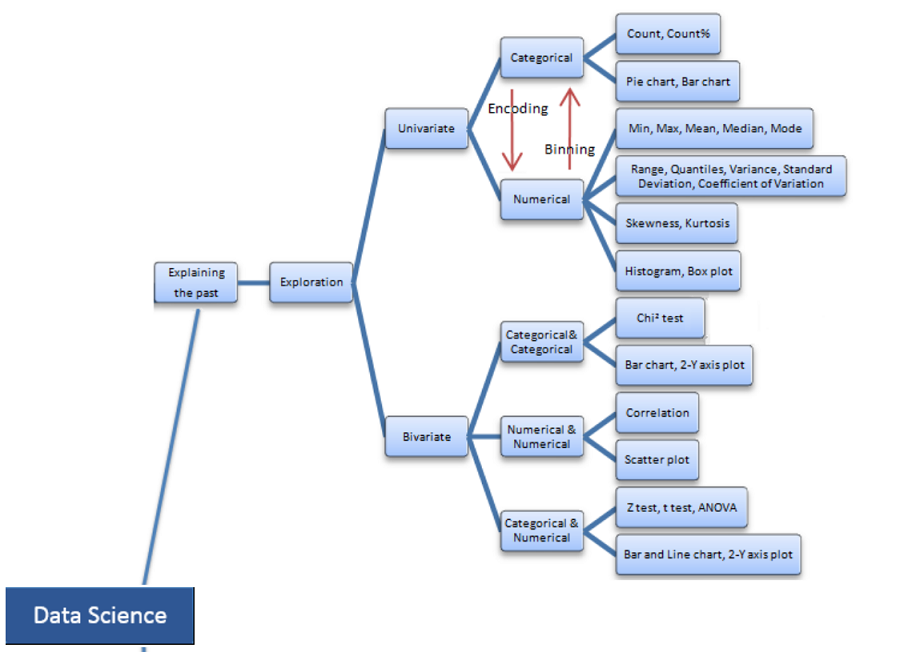

In [71]:
# contoh sederhana
import numpy as np

# membuat variable data
x = np.array([10.00, 8.00, 13.00, 9.00, 11.00, 14.00, 6.00, 4.00, 12.00, 7.00, 5.00])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# menjadikan data tersebut sebagai dataframe
dataset = pd.DataFrame({'x': x, 'y': y}, columns = ['x', 'y'])

# print dataset
dataset

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [72]:
# melihat statistik sederhana dari dataset
dataset.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


D:\SOFTWARE\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


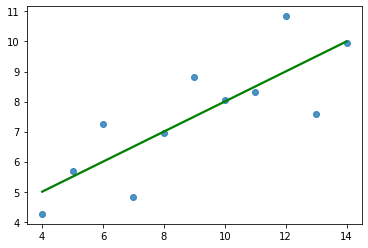

In [73]:
# EDA menggunakan scatter plot
import seaborn as sns

sns.regplot(x, y, ci=None, line_kws={'color': 'green'})

[Knowlegde tambahan](https://www.itl.nist.gov/div898/handbook/eda/section1/eda16.htm):
1. Data yang ada tersebar di linear curve
2. Tidak ada outlier

## EDA dengan D-Tale

> [D-Tale](https://pypi.org/project/dtale/) is the combination of a Flask back-end and a React front-end to bring you an easy way to view & analyze Pandas data structures.

Keunggulannya:
1. Mudah digunakan.
2. Terintegrasi dengan ipython notebooks dan python/ipython terminals.
3. Sudah support DataFrame, Series, MultiIndex, DatetimeIndex & RangeIndex.

In [74]:
#!pip install dtale

In [75]:
import pandas as pd
df_titanic = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/titanic.csv')

In [76]:
import dtale
dtale.show(df_titanic)

D:\SOFTWARE\conda\lib\site-packages\dtale\views.py:725: FutureWarning:

['Cabin', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Hal yang akan kita eksplore menggunakan dtale.
1. Describe, Histogram, Categories, [Q-Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0)
2. Cek outlier
3. Cek korelasi antara kolom
4. Cek missing value
5. Charts (mirip dengan point 1)

## EDA dan Manipulasi dengan Bamboolib

In [77]:
#import bamboolib as bam
#df_titanic

# Missing Value and Outlier

Hasil EDA menunjukkan fakta berikut:
1. Terdapat missing value pada kolom ```Age```, ```Cabin```, ```Embarked```.
2. Outlier pada kolom ```Fare```.

## Penanganan Missing Value

Kenapa masalah Missing Value harus kita atasi?

> Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.

Feature Engineering and Selection, 2019.

3 Tipe [Missing Value](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f):
1. Missing completely at random (MCAR). 
2. Missing at random (MAR). 
3. Missing not random (MNAR). 

<details>
<br>
Misal kita diminta untuk membuat model dari Age (Y) yang dipengaruhi oleh jenis kelamin (X) beberapa responden tidak memberikan jawaban atas pertanyaan berapa berat mereka. <br>
1. MCAR terjadi jika tidak ada alasan yang jelas kenapa responden tidak memberikan jawaban.<br>
2. MAR terjadi jika orang yang berjenis kelamin perempuan akan cenderung tidak memberikan jawaban jika ditanya berat, jadi missing value Y dipengaruhi oleh X.<br>
3. MNAR terjadi jika orang dengan kelas penghasilan tertentu, memiliki kecenderungan tidak memberikan jawaban. Sehingga missing value Y dipengaruhi oleh nilai lain yang tidak teramati.
</details>

Beberapa fungsi utama yang digunakan:
1. [library ```missingno```](https://github.com/ResidentMario/missingno)
2. [```df.isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
3. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
4. [```df.groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
5. [```df.loc()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
6. [```df.column.plot()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
7. [```df.column.skew()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html)
8. [```df.column.value_counts()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

In [78]:
# lihat missing value dengan fungsi .isnul()
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

2022-06-20 00:09:49,726 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-06-20 00:09:49,752 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-06-20 00:09:49,833 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


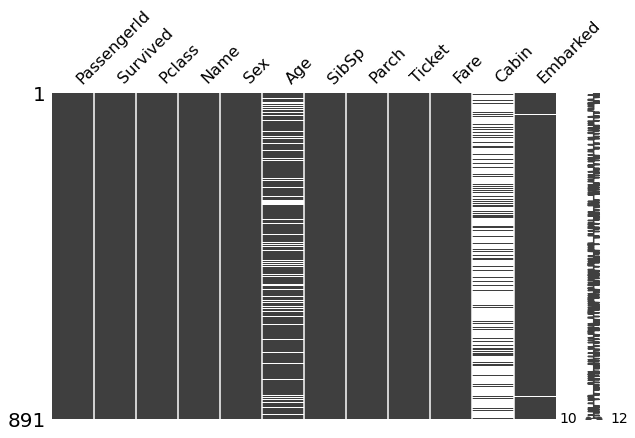

In [79]:
# visualiasi missing value dengan bantuan library
import missingno as msno
msno.matrix(df_titanic, figsize=(10, 6))

> Pertanyaan: missing value itu __dihapus__ atau bagaimana?

### Kolom Age

__Imputasi dengan mean atau median (Univariate)__ <br>

Metode pertama yang kita implementasikan adalah mengisi missing value dengan mean atau median berdasarkan perhitungan keseluruhan kolom ```Age``` saja.<br>

Hasilnya kita dapat memperhasikan efek yang berbeda dari pengisian tersebut dengan metode tersebut.

__Sebelum imputasi__

<AxesSubplot:title={'center':'Age Sebelum Imputasi'}, ylabel='Frequency'>

2022-06-20 00:09:50,223 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


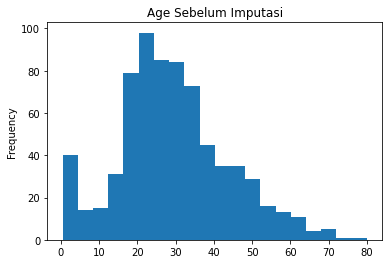

In [80]:
# melihat distribusi awal dari kolom Age
df_titanic.Age.plot.hist(title="Age Sebelum Imputasi", bins=20)

In [81]:
# melihat kecondongan distribusi kolom Age. Kecondongan yang baik itu dari -1 sampai dengan 1
df_titanic.Age.skew()

0.38910778230082704

In [82]:
df_titanic.Age.mean()

29.69911764705882

In [83]:
df_titanic.Age.median()

28.0

__Imputasi__

In [84]:
# fungsi fillna di pandas dapat digunakan untuk imputasi missing values
# taruh hasilnya di variable baru untuk mempermudah pengamatan
df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())

__Setelah imputasi__

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_median_uni'}>, <AxesSubplot:>]],
      dtype=object)

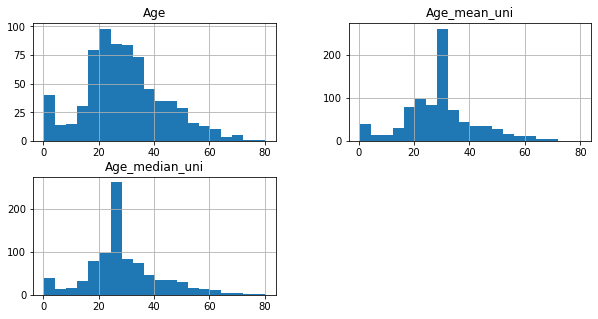

In [85]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].hist(bins=20, figsize=(10,5))

In [86]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_median_uni    0.510245
dtype: float64

__Imputasi dengan Mean berdasarkan kelompok/parameter lain (Multivariate)__ <br>

Solusi alternatif jika kita ingin melakukan imputasi missing value, dibandingkan kita memukul rata isian missing value pada kolom ```Age``` dengan mean atau median dari seluruh data. <br>

Kita bisa mengelompokan terlebih dahulu berdasarkan kolom lain (dalam hal ini adalah ```Sex``` sehingga imputasi dilakukan terhadap kelompok yang sama sehingga diharapkan hasilnya lebih <i>smooth</i>.

__Sebelum imputasi__

In [87]:
# mengetahui mean per kelompok sex, kita menggunakan groupby
df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
df_grouped

,Age
Sex,
female,27.915709
male,30.726645


__Imputasi__

Setelah mengetahui mean dari masing-masing group, kita bisa melakukan imputasi.

In [88]:
# imputasi untuk male group

# filter kondisi 
condition = df_titanic['Sex'] == 'male'

# tangkap nilai mean untuk laki2
mean_male = df_grouped.loc['male','Age']

# imputasi
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

In [89]:
# proses untuk female sama seperti diatas
condition = df_titanic['Sex'] == 'female'
mean_female = df_grouped.loc['female','Age']
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_female)

__Setelah imputasi__

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_mean_multi'}>, <AxesSubplot:>]],
      dtype=object)

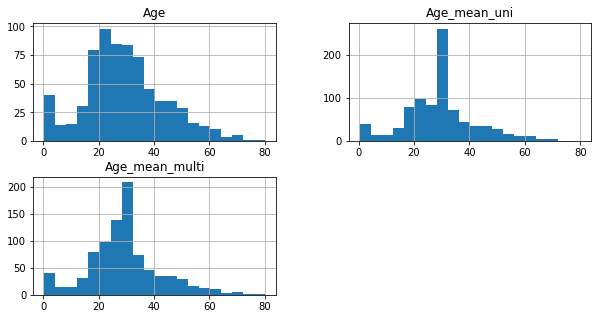

In [90]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].hist(bins=20, figsize=(10,5))

In [91]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_mean_multi    0.424586
dtype: float64

__Simpulan__: Melihat hasil skewness dari ```Age_mean_multi``` yang cukup bagus (mendekati 0), kita memilih hasil ini untuk digunakan sebagai parameter bantu pada analisis selanjutnya. 

Namun dibuka kemungkinan apabila saat implementasi model, peforma dari model masih tidak sesuai harapan, ```Age_mean_multi``` dapat diganti dengan ```Age_mean_uni```.

### Kolom Cabin

Pada kolom ```Cabin``` dikarenakan mayoritas data adalah missing value dan kita punya tidak cukup ide untuk mengisinya. 

Apabila kita paksa imputasi akan sangat bias dan tidak bisa menggambarkan situasi sebenarnya.  

Maka, solusinya kolom ```cabin``` lebih baik dihilangkan menggunakan fungsi ```.drop()```.

In [92]:
df_titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [93]:
# drop kolom menggunakan fungsi .drop()
df_titanic.drop(columns='Cabin', inplace = True)

In [94]:
# cek sisa kolom
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi'],
      dtype='object')

__Simpulan__: Kolom ```Cabin``` sudah tidak lagi menjadi fitur dalam pengembangan model.

### Kolom Embarked

In [95]:
# cek value counts (size masing-masing kelas)
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [96]:
# cek detail data yang kosong
df_titanic[df_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,62.0,62.0


In [97]:
df_titanic.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Kita bisa membuat dugaan awal bahwa kolom ```Embarked``` ini mungkin ada kaitannya dengan kolom lain yakni ```Ticket```. 

Untuk itu lakukan penelusuran, apakah ada nomor tiket dengan pola sejenis dengan data hilang.

In [98]:
# polanya di cek dengan fungsi .match
# pola yang digunakan adalah cari tiket yang diawali dengan '113'

df_titanic[(df_titanic.Ticket.str.match('^113'))].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,S,36.0,36.0,36.0
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1,S,19.0,19.0,19.0
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,S,14.0,14.0,14.0


In [99]:
# Cek tiket dengan nomor yang sama df_titanic[(df_titanic.Ticket== '113776)]

In [100]:
# cek distribusi count tiket dengan pola str '113'
df_titanic[df_titanic.Ticket.str.match('^113')].Embarked.value_counts()

S    41
C     4
Name: Embarked, dtype: int64

Dari distribusinya tiket dengan nomor seri 113, memiliki probabilitas lebih tinggi bahwa penumpang naik dari pelabuhan ```S```.

In [101]:
# kita bisa menggunakan modus dari distribusinya, yaitu 'S'
# implementasi menggunakan fungsi .fillna()
df_titanic.Embarked.fillna('S', inplace = True)

In [102]:
# cek setelah implementasi
df_titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

__Simpulan__: Hasil imputasi missing values pada kolom ```Embarked```, menambah jumlah kategori ```S``` dari 644 ke 646.

## Penanganan Outlier

Sumber:

1. https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/
2. https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
3. https://nitin9809.medium.com/outlier-detection-and-treatment-part-1-aa0b09f60e50

Beberapa fungsi dan library yang digunakan:
1. library [```DBSCAN```](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
2. library [```MinMaxScaler```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. [```df.quantile()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
4. [```df.mean()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).
5. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna).
5. dst.

### Deteksi outlier secara univariate

__Box plot__

Jarak antar bagian di box menunjukkan derajat dispersi (penyebaran) dan skewness (kecondongan) dalam data. 

Bagian dari box adalah bidang yang menyajikan __interquartile range (IQR)__.

Panjang box ditentukan oleh IQR ini.

Semakin tinggi (jika boxplot vertikal) atau semakin lebar (jika boxplot horizontal) bidang IQR ini, menunjukkan data semakin menyebar.

<AxesSubplot:>

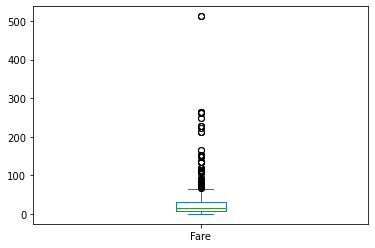

In [103]:
df_titanic.Fare.plot.box()

**Interquartile range**

IQR mendeskripsi bagian tengah atau 50% dari nilai jika diurutkan dari terendah ke tertinggi.

Untuk mendapatkan nilai IQR, langkah pertama adalah menemukan ```median``` dari ```batas bawah (Q1)``` dan ```batas atas (Q3)``` dari distribusi data.

IQR adalah beda antara Q3 dan Q1.

Kemudian setelah mendapatkan IQR, kita akan menghitung whisker minimal (iqr_lower) dan maksimal (iqr_upper).

Nilai diluar iqr_lower dan iqr_upper adalah outlier.


<details>

Penjelasan IQR
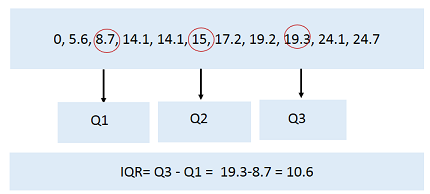
    
Hubungan IQR pada Box plot
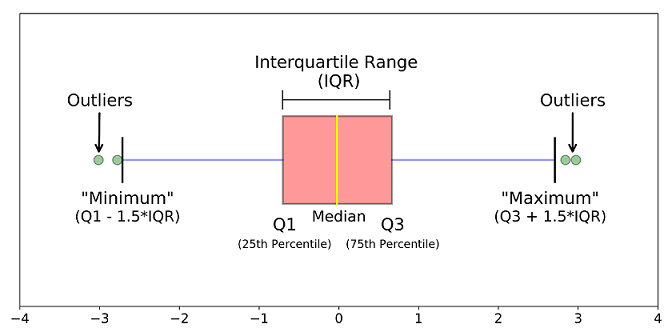
</details>

In [104]:
# menghitung Q1 dan Q3
q1 = df_titanic['Fare'].quantile(0.25)
q3 = df_titanic['Fare'].quantile(0.75)

# menghitung IQR
iqr = q3 - q1

# menghitung batas bawah dan batas atas
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

In [105]:
# print hasil
(iqr_lower, iqr_upper)

(-26.724, 65.6344)

In [106]:
# contoh outlier dengan nilai kurang dari iqr_lower
df_titanic[df_titanic.Fare < iqr_lower]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi


In [107]:
# contoh outlier dengan nilai lebih dari iqr_upper
df_titanic[df_titanic.Fare > iqr_upper].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,S,21.0,21.0,21.0
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,C,48.0,48.0,48.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0


In [108]:
(df_titanic.Fare > iqr_upper).sum()

116

Apa yang harus kita lakukan, pilihan opsinya:
1. Membuang outlier tersebut.
2. Melakukan imputasi nilai. 

Disini kami contohkan untuk melakukan imputasi menggunakan mean.

In [109]:
# ganti nilai outliner dengan na sehingga menjadi missing value
df_titanic['Fare_iqr'] = df_titanic['Fare']
df_titanic.loc[df_titanic['Fare_iqr'] < iqr_lower, 'Fare_iqr'] = pd.NA
df_titanic.loc[df_titanic['Fare_iqr'] > iqr_upper, 'Fare_iqr'] = pd.NA

In [110]:
# cek implementasi missing value
df_titanic.Fare_iqr.isna().sum()

116

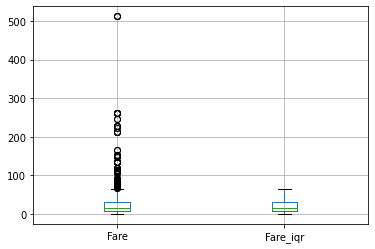

In [111]:
# imputasi NaN dengan mean

df_titanic['Fare_iqr'].fillna(df_titanic.Fare.mean(),inplace=True)

# tampilkan box plot
boxplot = df_titanic.boxplot(column=['Fare','Fare_iqr'])

__Simpulan__: Perlu kehati-hatian dalam mengimplementasikan metode IQR. IQR dapat digunakan apabila sebaran data kita sempit.

### Deteksi outlier secara multivariate

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections. 

Dalam kasus ini kita coba mengkoreksi data outlier ```Fare``` dengan bantuan dari variable lain yakni ```Age```.

Kemudian kita melihat apakah ada outlier dengan melihat kerapatan data menggunakan metode [__Density-Based Spatial Clustering of Applications with Noise (DBSCAN)__](https://towardsdatascience.com/dbscan-with-python-743162371dca).
> Metode clustering menggunakan machine learning untuk memisahkan cluster dengan density tinggi dari cluster dengan density rendah.

__Sebelum imputasi__

<AxesSubplot:xlabel='Age_scaled', ylabel='Fare_scaled'>

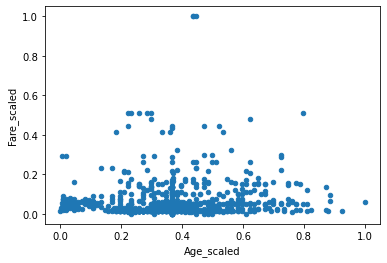

In [112]:
# load dictionary
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# lakukan standarisasi data agar skalanya sama
scaler = MinMaxScaler()
df_titanic['Fare_scaled'] = scaler.fit_transform(df_titanic[['Fare']])
df_titanic['Age_scaled'] = scaler.fit_transform(df_titanic[['Age_mean_uni']])

# visualisasikan dua features ini dalam bentuk scatter
df_titanic.plot.scatter(y = 'Fare_scaled', x = 'Age_scaled')

<details>

Penjelasan parameter:
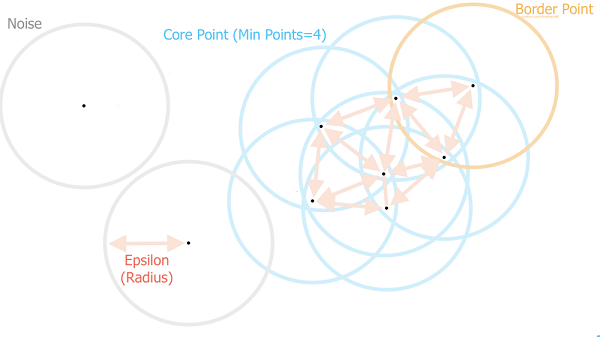
</details>

In [113]:
DBSCAN_model = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 3, n_jobs = -1)

# fit model
clusters = DBSCAN_model.fit_predict(df_titanic[['Fare_scaled', 'Age_scaled']])

# simpan hasil clustering ke kolom baru
df_titanic['Is_outlier'] = clusters

# hasil cluster akan ada dua 0 tidak outlier, 1 merupakan outlier
# pd.Series(clusters).value_counts() ==> cek

In [114]:
df_titanic.Is_outlier.value_counts()

0    888
1      3
Name: Is_outlier, dtype: int64

In [115]:
# lookup data yang outlier
df_titanic[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1


__Imputasi dengan Mean dari kolom Fare saja__

In [116]:
# membuat satu kolom baru yang isinya sama dengan Fare
df_titanic['Fare_dbscan'] = df_titanic['Fare']

In [117]:
# dapatkan mean dari Fare
fare_mean = df_titanic[df_titanic['Is_outlier']==0].Fare.mean()

# isikan nilai mean ke nilai outlier
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean

__Setelah imputasi__

In [118]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,30.582164
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164


__Imputasi dengan Mean hasil analisis dari kolom Embarked__

Sebagaimana kita ketahui bahwa hasil deteksi outlier di atas, kesemuanya berangkat dari pelabuhan C dengan seri ```Ticket``` yang sama. 

Dibandingkan menggunakan mean dari seluruh penumpang, kita bisa coba gunakan mean dari penumpang lain dari kelompok pemberangkatan ```Embarked``` yang sama.

In [119]:
df_titanic.loc[df_titanic['Is_outlier']==0, ['Fare','Embarked']].groupby(by='Embarked').agg(['describe'])

Fare                                                           \
         describe                                                            
            count       mean        std     min      25%      50%      75%   
Embarked                                                                     
C           165.0  51.729143  57.953950  4.0125  13.4167  28.7125  76.7292   
Q            77.0  13.276030  14.188047  6.7500   7.7500   7.7500  15.5000   
S           646.0  27.243651  35.952905  0.0000   8.0500  13.0000  27.9000   

                   
                   
              max  
Embarked           
C         262.375  
Q          90.000  
S         263.000

In [120]:
# isikan ke nilai outlier yang sudah jadi NA
fare_mean_C = df_titanic[(df_titanic['Is_outlier'] == 0) & (df_titanic['Embarked'] == 'C')].Fare.mean()
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean_C

In [121]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,51.729143
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143


__Jika kita mengasumsikan terjadi salah ketik di nama tiket__

Dari deskripsi statistik masing-masing group ```Embarked``` mean untuk data ```Fare``` penumpang yang berangkat dari pelabuhan C memiliki mean di nilai ```51.73```. 

Kita dapat juga berasumsi bahwa outlier ```512.3292``` itu bisa jadi typo dan mungkin maksudnya ```51.2329```

In [122]:
# langsung koreksi 
# df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = 51.2329

__Simpulan__: Untuk mempertajam analisis kita saat mendeteksi outlier, kita bisa menggunakan kolom lain sebagai fitur tambahan dan mengimplementasikannya menggunakan DBSCAN.

Kita menggunakan kolom Ticket sebagai fitur yang dapat membantu kita mendeteksi outlier pada kolom Fare.

# Feature Enginering 

Dari hasil sementara EDA, tanamkan hal berikut di pikiran kita:
1. Apakah ada kemungkinan untuk mendapatkan tambahan informasi atau mengurangi noise dari datanya.
2. Bisakah kita mengkombinasikan data dalam bentuk berbeda, sehingga menjadi lebih informatif.
3. Adakah kemungkinan kita untuk menggunakan data tambahan dari eksternal.

Sumber: https://towardsdatascience.com/what-is-feature-engineering-bfd25b2b26b2

Kunci: __KREATIF !__

## Ekstraksi inisial dari kolom Name sebagai fitur

Jika kita telusuri di kolom name akan terlihat bahwa kolom ini adalah kolom yang sangat unit dengan tingkat cardinality yang tinggi. 

Beberapa dari kita mungkin akan melakukan drop terhadap kolom ini.

Namun jika bisa lebih teliti, ada satu pola yang kita bisa ekstrak dan memberikan nilai tambah pada dataset kita.

Dalam hal ini, kita akan melakukan ekstraksi gelar sosial pada nama seperti Mr. Miss. Mrs. sebagai menggunakan regex.

Beberapa fungsi dan library yang digunakan:
1. [```RegEx```](https://docs.python.org/3/howto/regex.html).
2. ```df.column.replace()```.
3. ```df.column.value_counts()```
4. Library [```One Hot Encoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
5. dst.

In [123]:
df_titanic[['Name']].sample(5)

,Name
56,"Rugg, Miss. Emily"
855,"Aks, Mrs. Sam (Leah Rosen)"
845,"Abbing, Mr. Anthony"
468,"Scanlan, Mr. James"
357,"Funk, Miss. Annie Clemmer"


In [124]:
# extract gelar pada nama menggunakan regex dan simpan ke kolom baru
df_titanic['Initial'] = df_titanic.Name.str.extract('(\w+)\.')

In [125]:
# cek distribusi count
df_titanic.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [126]:
# melakukan perbaikan atas inisial yang munkin salah tulis, atau tidak sesuai kriteria
# menggunakan fungsi .replace()

replace_dict =  {'Mlle': 'Miss',
                 'Mme': 'Miss',
                 'Ms': 'Miss',
                 'Dr': 'Mr',
                 'Major': 'Mr',
                 'Lady': 'Mrs',
                 'Countess': 'Mrs',
                 'Jonkheer': 'Other',
                 'Col': 'Other',
                 'Rev': 'Other',
                 'Capt': 'Mr',
                 'Sir': 'Mr',
                 'Don': 'Mr'}

df_titanic['Initial'].replace(replace_dict,inplace=True)

In [127]:
# cek distribusi count setelah perbaikan

df_titanic.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

__Simpulan__: Telah diekstraksi data dari kolom Name menjadi informasi yang bernilai tambah, dan disimpan pada kolom Initial.

## Pengelompokan penumpang berdasarkan kolom Age (Binning)

[Binning](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950) adalah teknik mengkonversi data numerical menjadi categorical, dengan menggunakan range.

Fungsi yang digunakan, [```pd.cut()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Misalkan:

|Age|Category|
|--- |--- |
|0-15|child|
|16-30|young_adult|
|31-50|adult|
|>50|elderly|

In [128]:
# membuat varible baru bernama cut_points
# merupakan batas dari setiap kategori
cut_points = [0, 15, 30, 50, 100]

# membuat label atas kategorinya
age_label = ['child', 'young_adult', 'adult', 'elderly']

# implementasi label tersebut dengan membuat kolom baru bernama age_label
df_titanic['Age_group'] = pd.cut(df_titanic['Age_mean_uni'], bins=cut_points, labels=age_label, include_lowest=True)

In [129]:
# print hasil implementasi
df_titanic.sample(3)[['Age_group','Age_mean_uni']]

,Age_group,Age_mean_uni
497,young_adult,29.699118
79,young_adult,30.000000
240,young_adult,29.699118


__Simpulan__: Telah dikategorikan range ```Age``` pada kolom ```Age_group```.

## Encoding

Beberapa fungsi dan library yang digunakan:
1. library [```LabelEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).
2. dictionary ```{}```.
3. [```df.Series.map()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html).
4. dst.

### Kolom Sex

Label encoding digunakan untuk mengubah data categorical menjadi nominal. 

In [130]:
# cek ada berapa label pada kolom sex
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

Karena hanya ada 2 distinct values (low cardinality), kita cukup pakai dictionary untuk labeling.

In [131]:
# membuat dictionary, 0 untuk male dan 1 untuk female
label_sex = {'male':0,'female':1}

# gunakan fungsi map pada pandas untuk mengaplikasikan labeling
df_titanic['Sex_enc'] = df_titanic['Sex'].map(label_sex)

# print hasil implementasi
df_titanic[['Name','Sex','Sex_enc']].sample(3)

,Name,Sex,Sex_enc
398,"Pain, Dr. Alfred",male,0
664,"Lindqvist, Mr. Eino William",male,0
840,"Alhomaki, Mr. Ilmari Rudolf",male,0


__Simpulan__: kategori male dan female sudah berubah menjadi 0 dan 1.

### Kolom Embarked

Jika jumlah kelas pada variabel kategori sangat banyak (high cardinality).

Kita __tidak mungkin melakukannya secara manual__ menggunakan dictionary. 

Oleh karenanya kita perlu menggunakan bantuan library salah satunya adalah [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) di scikit learn.

In [132]:
# load library
from sklearn.preprocessing import LabelEncoder

# inisiasi encoder
le = LabelEncoder()

# fiting dan transform ke model
df_titanic['Embarked_enc'] = le.fit_transform(df_titanic['Embarked'])

In [133]:
# print hasil implementasi
df_titanic[['Name','Embarked','Embarked_enc']].sample(3)

,Name,Embarked,Embarked_enc
394,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",S,2
292,"Levy, Mr. Rene Jacques",C,0
317,"Moraweck, Dr. Ernest",S,2


__Simpulan__: kategori C, Q, dan S sudah berubah menjadi 0, 1 dan 2.

### Kolom Initial

Dari hasil ekstraksi fitur, kita memperoleh lima jenis kategorikal.

Sebelumnya kita sudah kenal cara melakukan encoding dengan menggunakan dictionary dan LabelEncoder.

Untuk kali ini akan kita implementasikan satu teknik lainnya, yaitu One Hot Encoding.

__Kenapa kita menggunakannya?__

Label Encoding adalah kategori sekarang memiliki [urutan (natural order)](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/). 

Komputer secara alami akan memberikan angka yang lebih tinggi, bobot yang lebih tinggi. 

Untuk mengatasinya kita menggunakan One Hot Encoding.

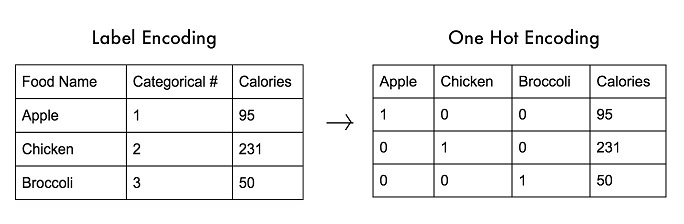

Sumber: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

In [134]:
# load library 
from sklearn.preprocessing import OneHotEncoder 

# inisiasi encoder 
ohc = OneHotEncoder(handle_unknown='ignore')

# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Initial']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Initial'].unique()]
df_initial_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_initial_ohc.sample(3)

,Mr,Mrs,Miss,Master,Other
215,0.0,1.0,0.0,0.0,0.0
655,0.0,0.0,1.0,0.0,0.0
419,0.0,1.0,0.0,0.0,0.0


In [135]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_initial_ohc], axis=1)

In [136]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_dbscan,Initial,Age_group,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.35,...,12.35,Other,elderly,0,1,0.0,0.0,0.0,0.0,1.0
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.75,...,7.75,Mr,young_adult,0,1,0.0,0.0,1.0,0.0,0.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.00,...,0.00,Mr,young_adult,0,2,0.0,0.0,1.0,0.0,0.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Initial```.

### Kolom Age_group

Sama seperti sebelumnya, kita akan implementasikan OHE untuk kolom ```Age_group```.

In [137]:
# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Age_group']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Age_group'].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)

,young_adult,adult,elderly,child
766,0.0,0.0,0.0,1.0
557,0.0,0.0,0.0,1.0
749,1.0,0.0,0.0,0.0


In [138]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_age_group_ohc], axis=1)

In [139]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,...,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,...,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Age_group```.

In [140]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi', 'Fare_iqr', 'Fare_scaled', 'Age_scaled', 'Is_outlier',
       'Fare_dbscan', 'Initial', 'Age_group', 'Sex_enc', 'Embarked_enc', 'Mr',
       'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
       'child'],
      dtype='object')

In [141]:
columns_to_keep = ['Survived', 'Pclass', 'Fare_dbscan', 'Sex_enc', 'Embarked_enc', 'Mr',
                   'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
                   'child']

In [142]:
df_titanic = df_titanic[columns_to_keep]

In [143]:
df_titanic.head(3)

,Survived,Pclass,Fare_dbscan,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
0,0,3,7.2500,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,71.2833,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,7.9250,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
